In [8]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("Cleaned_Crop_Production.csv")

In [10]:
df.describe()

,Crop_Year,Area,Production,Yield
count,242361.000000,2.423610e+05,2.423610e+05,242361.000000
mean,2005.625773,1.216741e+04,5.825034e+05,41.649059
std,4.958285,5.085744e+04,1.706581e+07,817.572839
min,1997.000000,1.000000e-01,0.000000e+00,0.000000
25%,2002.000000,8.700000e+01,8.800000e+01,0.513514
50%,2006.000000,6.030000e+02,7.290000e+02,1.000000
75%,2010.000000,4.545000e+03,7.023000e+03,2.355450
max,2015.000000,8.580100e+06,1.250800e+09,88000.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242361 entries, 0 to 242360
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     242361 non-null  object 
 1   District_Name  242361 non-null  object 
 2   Crop_Year      242361 non-null  int64  
 3   Season         242361 non-null  object 
 4   Crop           242361 non-null  object 
 5   Area           242361 non-null  float64
 6   Production     242361 non-null  float64
 7   Yield          242361 non-null  float64
 8   Crop_Category  242361 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 16.6+ MB


In [12]:
df['Crop_Category'].value_counts()

Crop_Category
Cereals        63487
Pulses         60272
Oilseeds       45752
Vegetables     25460
Spices         18404
Cash Crops     10561
Fibre Crops     7602
Fruits          6154
Nuts            4660
Unknown            9
Name: count, dtype: int64

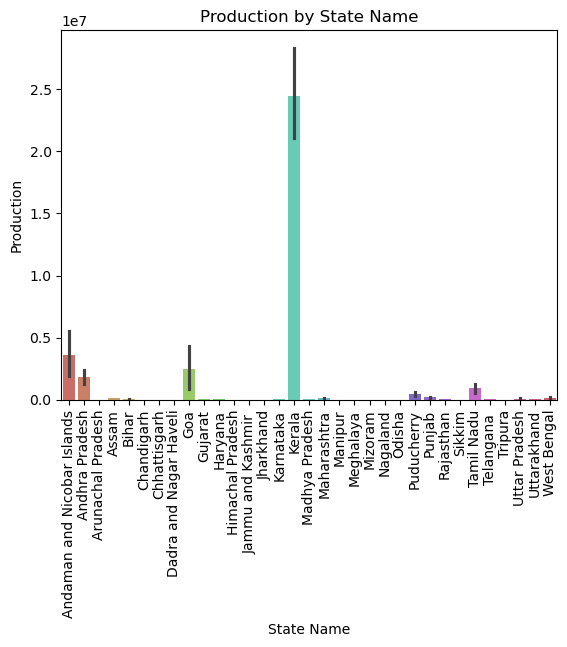

In [13]:
sns.barplot(x="State_Name", y="Production", data=df,palette="hls", hue="State_Name", legend= False)
plt.xticks(rotation=90)
plt.title('Production by State Name')
plt.xlabel('State Name')
plt.ylabel('Production')
plt.show()


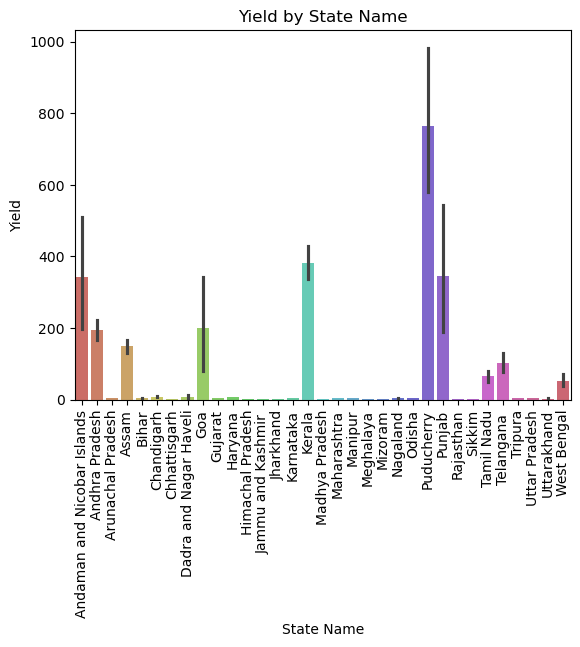

In [14]:
sns.barplot(x="State_Name", y="Yield", data=df,palette="hls", hue="State_Name", legend= False)
plt.xticks(rotation=90)
plt.title('Yield by State Name')
plt.xlabel('State Name')
plt.ylabel('Yield')
plt.show()

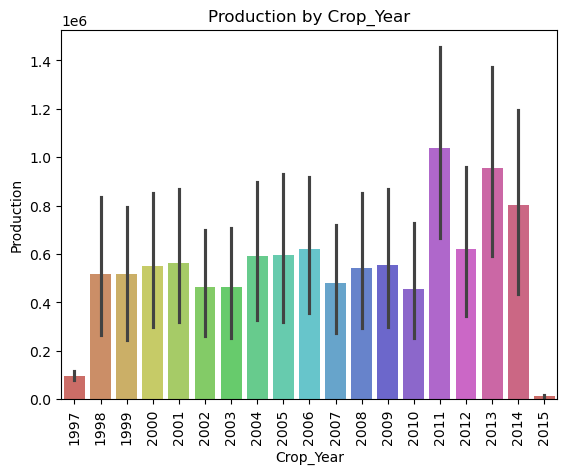

In [15]:
sns.barplot(x="Crop_Year", y="Production", data=df,palette="hls", hue="Crop_Year", legend= False)
plt.xticks(rotation=90)
plt.title('Production by Crop_Year')
plt.xlabel('Crop_Year')
plt.ylabel('Production')
plt.show()

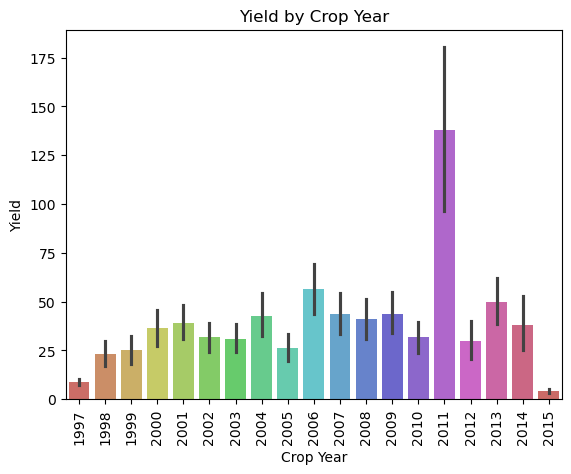

In [16]:
sns.barplot(x="Crop_Year", y="Yield", data=df,palette="hls", hue="Crop_Year", legend= False)
plt.xticks(rotation=90)
plt.title('Yield by Crop Year')
plt.xlabel('Crop Year')
plt.ylabel('Yield')
plt.show()

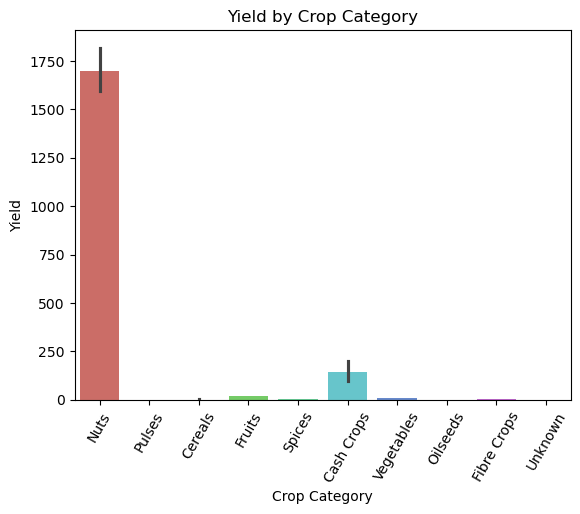

In [17]:
sns.barplot(x="Crop_Category", y="Yield", data=df,palette="hls", hue="Crop_Category", legend= False)
plt.xticks(rotation=60)
plt.title('Yield by Crop Category')
plt.xlabel('Crop Category')
plt.ylabel('Yield')
plt.show()

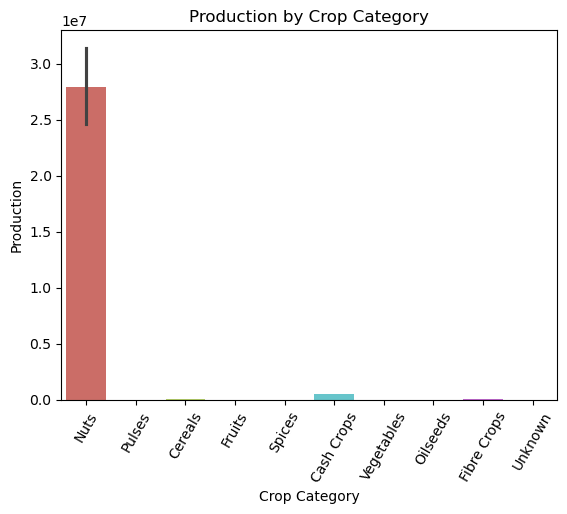

In [18]:
sns.barplot(x="Crop_Category", y="Production", data=df,palette="hls", hue="Crop_Category", legend= False)
plt.xticks(rotation=60)
plt.title('Production by Crop Category')
plt.xlabel('Crop Category')
plt.ylabel('Production')
plt.show()

                     Crop   Yield
                  Coconut 7911110
                Sugarcane 1526291
                   Potato   88962
                   Banana   84793
                    Onion   82797
             Sweet potato   36471
                    Maize   36297
                     Rice   30088
                  Tapioca   29737
                    Wheat   16482
               Dry ginger   16038
                   Papaya   13842
                     Jute   13314
                 Turmeric   11486
                   Garlic   10707
                Groundnut   10480
                Cashewnut   10333
                    Mesta    9853
             Cotton(lint)    9041
             Dry chillies    8812
                   Barley    7502
                    Jowar    7329
                    Bajra    6314
                     Gram    6000
                Arhar/Tur    5961
        Rapeseed &Mustard    5802
    Peas & beans (Pulses)    5634
                Sunflower    5177
              

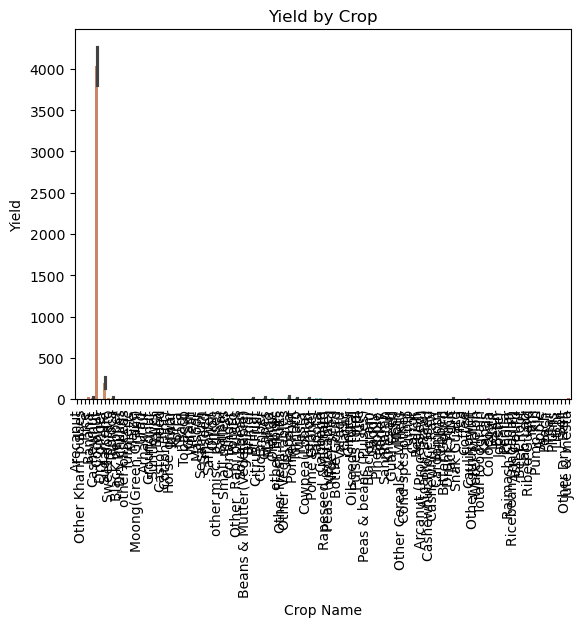

In [91]:
crop_yield = df.groupby('Crop', as_index=False)['Yield'].sum()
crop_yield['Yield'] = crop_yield['Yield'].astype(int)
sorted_crop_yield = crop_yield.sort_values(by='Yield', ascending=False)
pd.set_option('display.max_rows', None)  
pd.set_option('display.float_format', '{:.0f}'.format) 
print(sorted_crop_yield.to_string(index=False))

sns.barplot(x="Crop", y="Yield", data=df,palette="hls", hue="Crop", legend= False)
plt.xticks(rotation=90)
plt.title('Yield by Crop')
plt.xlabel('Crop Name')
plt.ylabel('Yield')
plt.show()

                   Crop    Production
28              Coconut  1.299816e+11
106           Sugarcane  5.535682e+09
95                 Rice  1.605470e+09
119               Wheat  1.332826e+09
87               Potato  4.248263e+08
..                  ...           ...
71   Other Citrus Fruit  0.000000e+00
35             Cucumber  0.000000e+00
58               Litchi  0.000000e+00
54              Lab-Lab  0.000000e+00
0                 Apple  0.000000e+00

[124 rows x 2 columns]


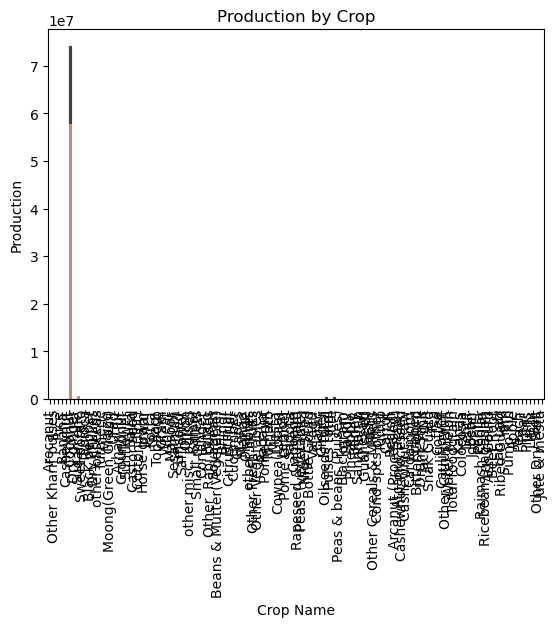

In [20]:
crop_production = df.groupby('Crop', as_index=False)['Production'].sum()
sorted_crop_production = crop_production.sort_values(by='Production', ascending=False)
print(sorted_crop_production[['Crop', 'Production']])

sns.barplot(x="Crop", y="Production", data=df,palette="hls", hue="Crop", legend= False)
plt.xticks(rotation=90)
plt.title('Production by Crop')
plt.xlabel('Crop Name')
plt.ylabel('Production')
plt.show()

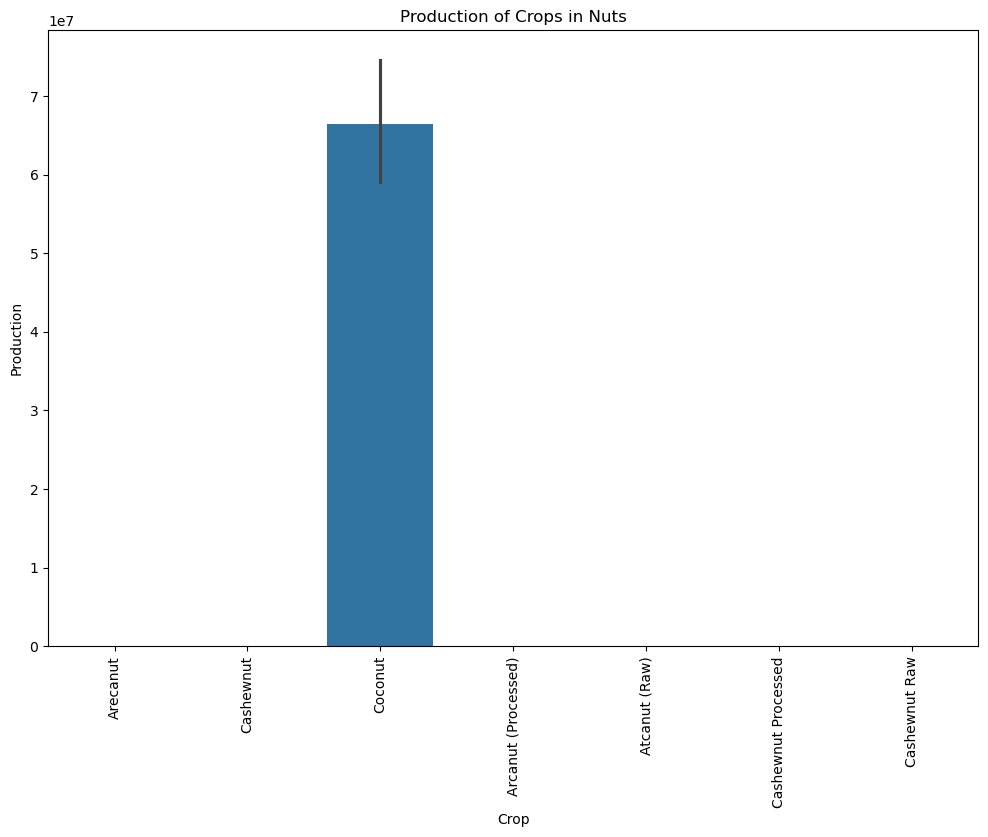

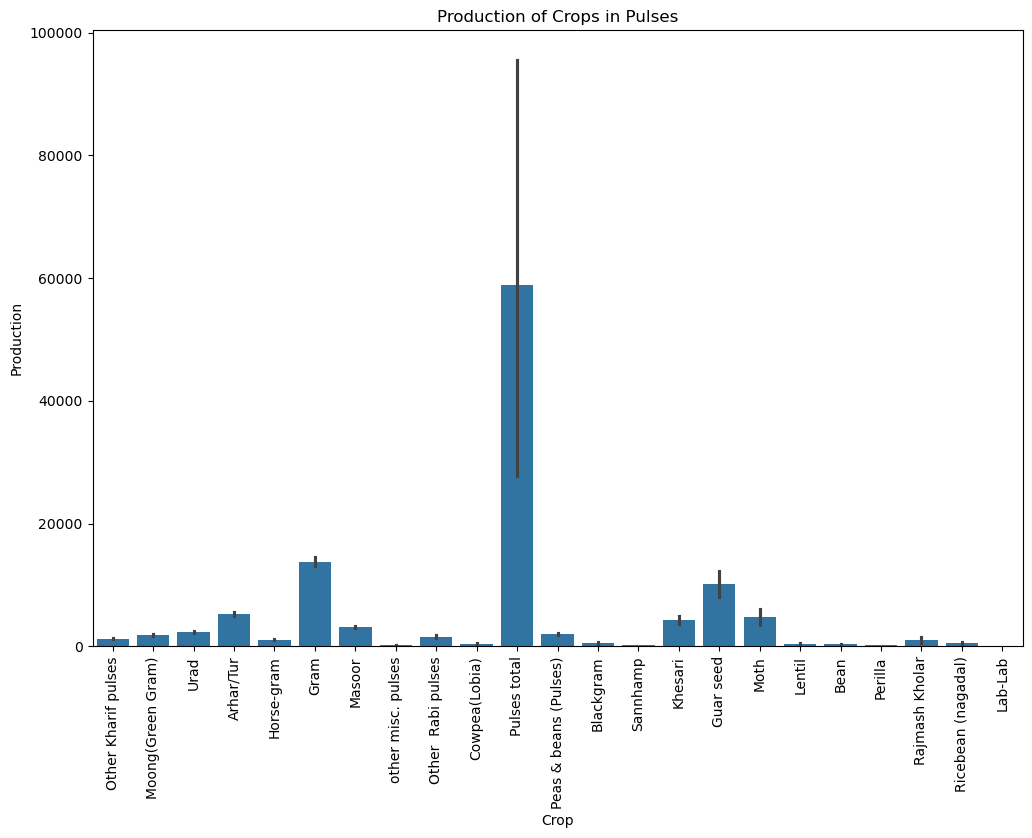

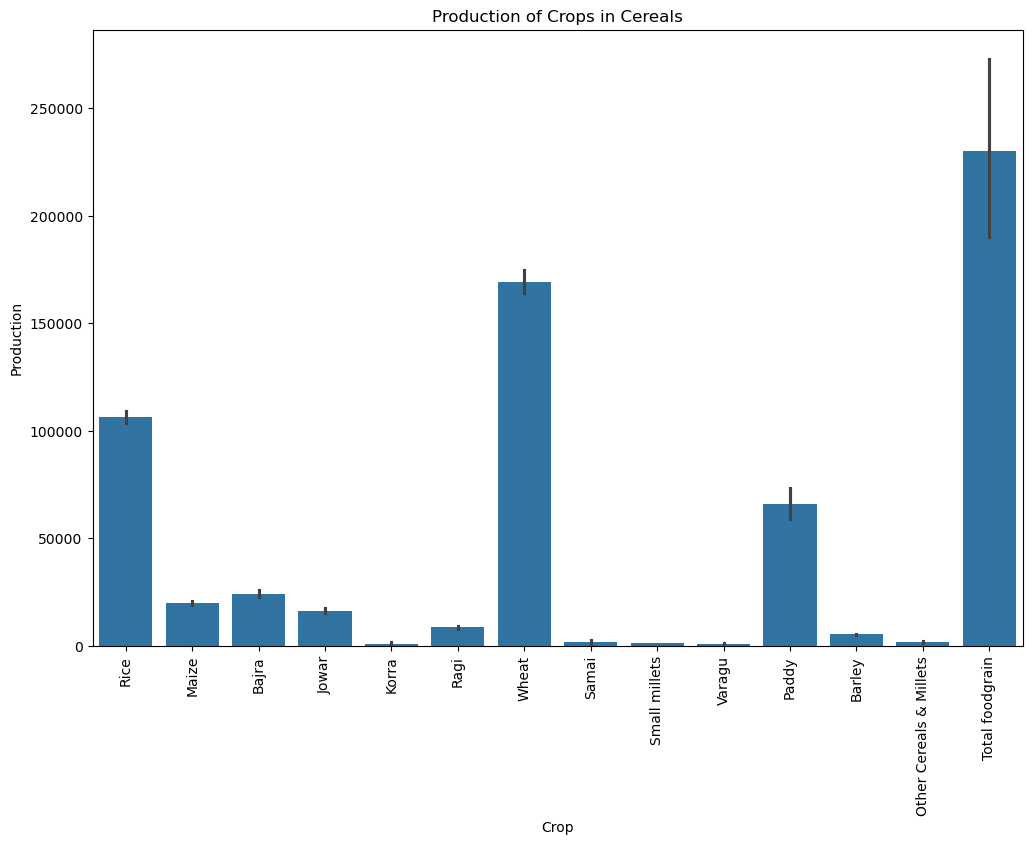

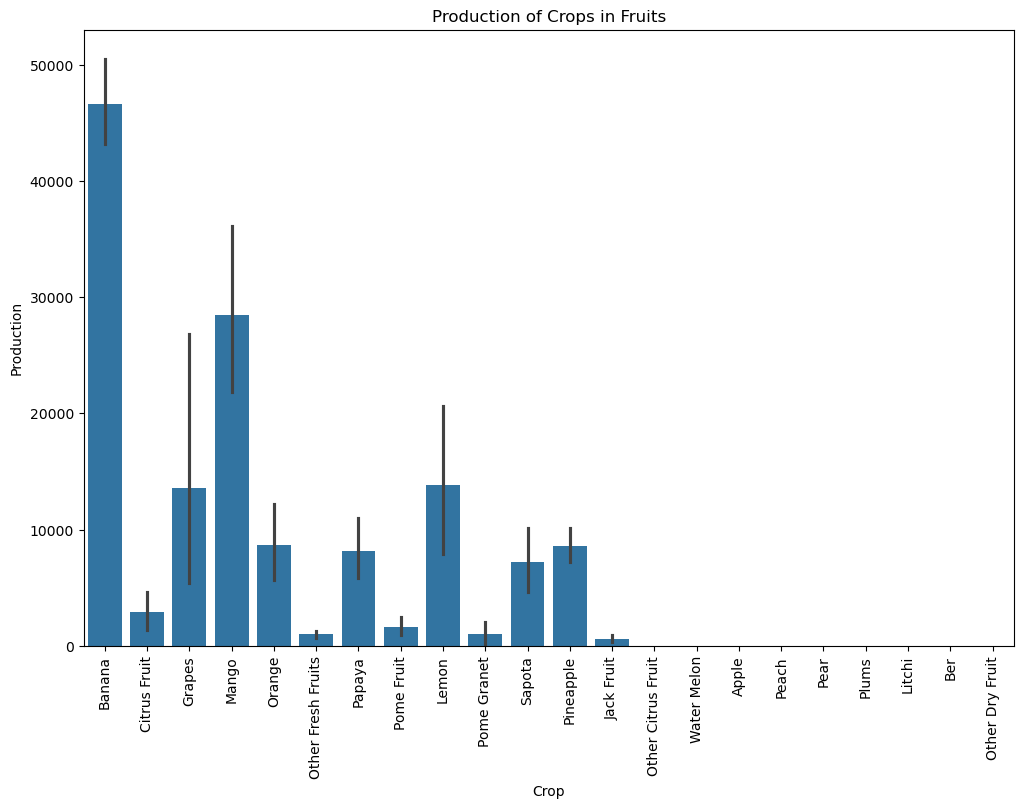

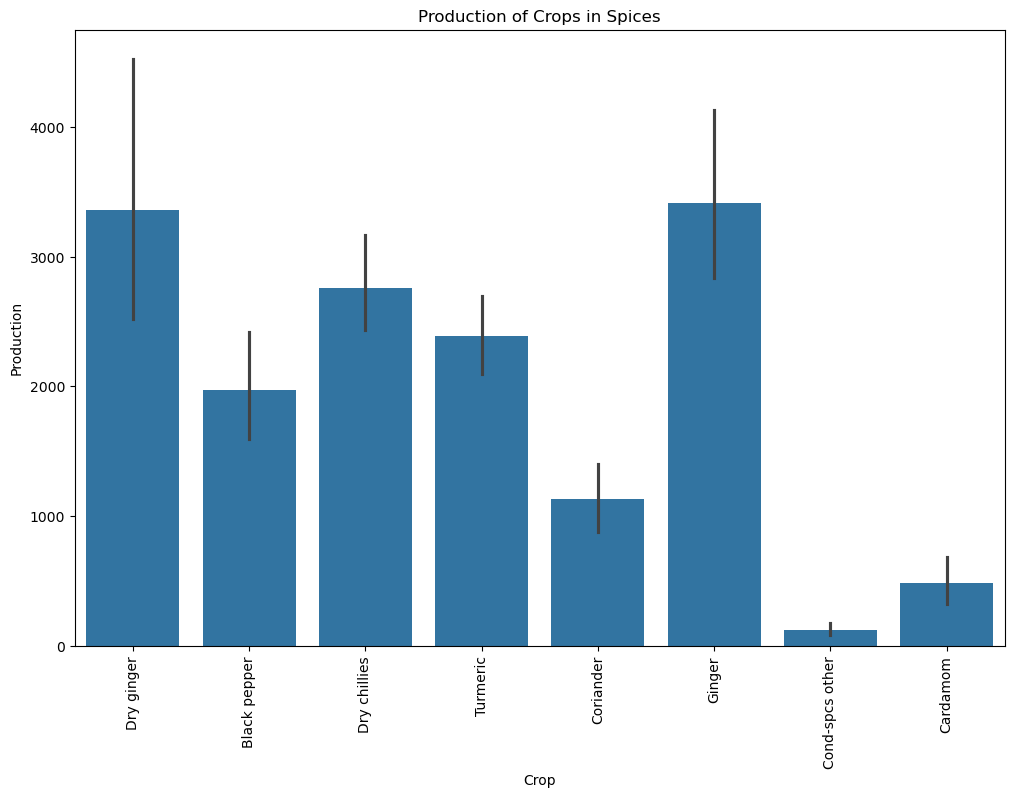

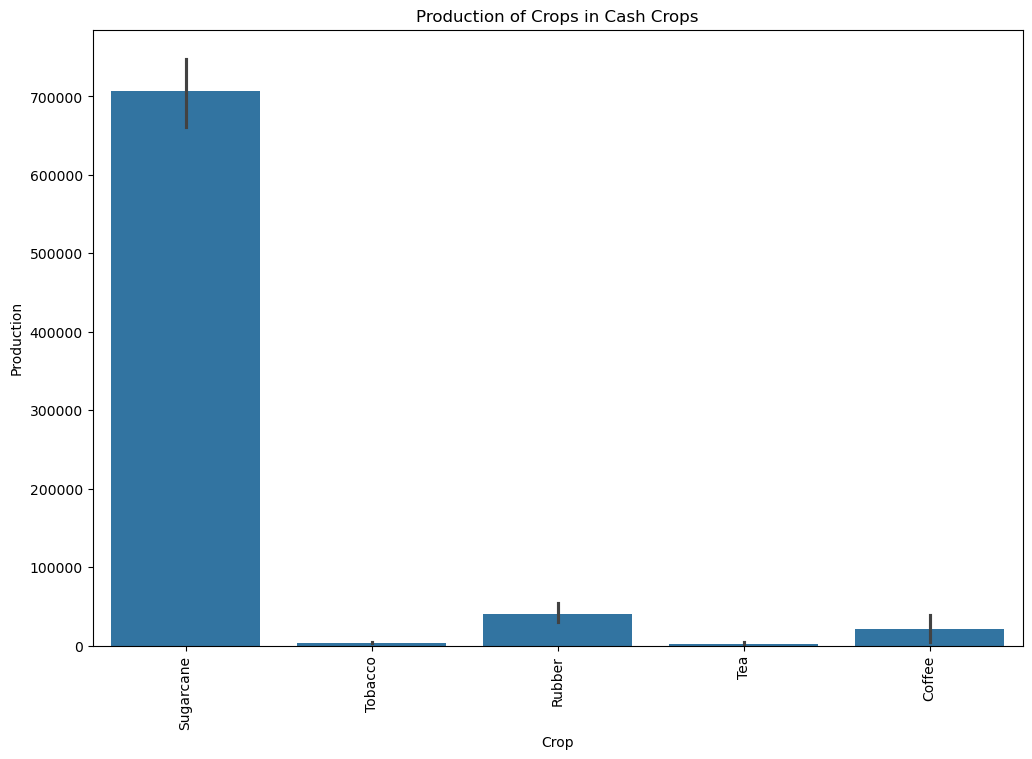

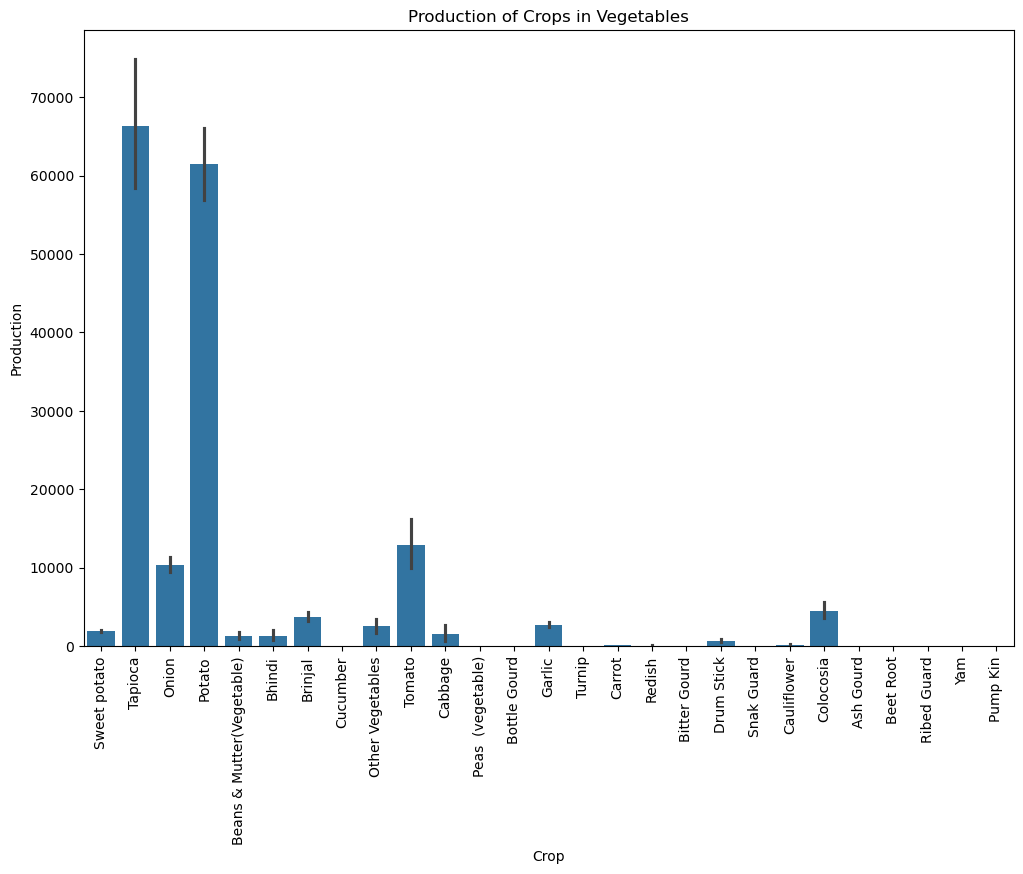

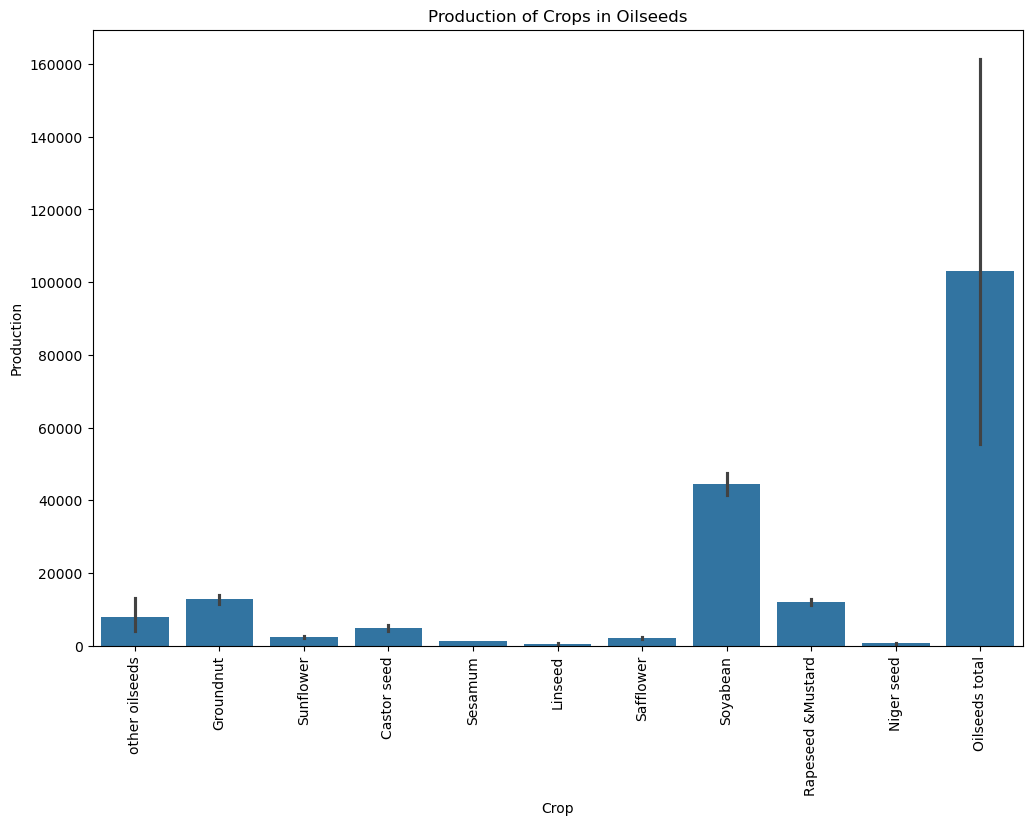

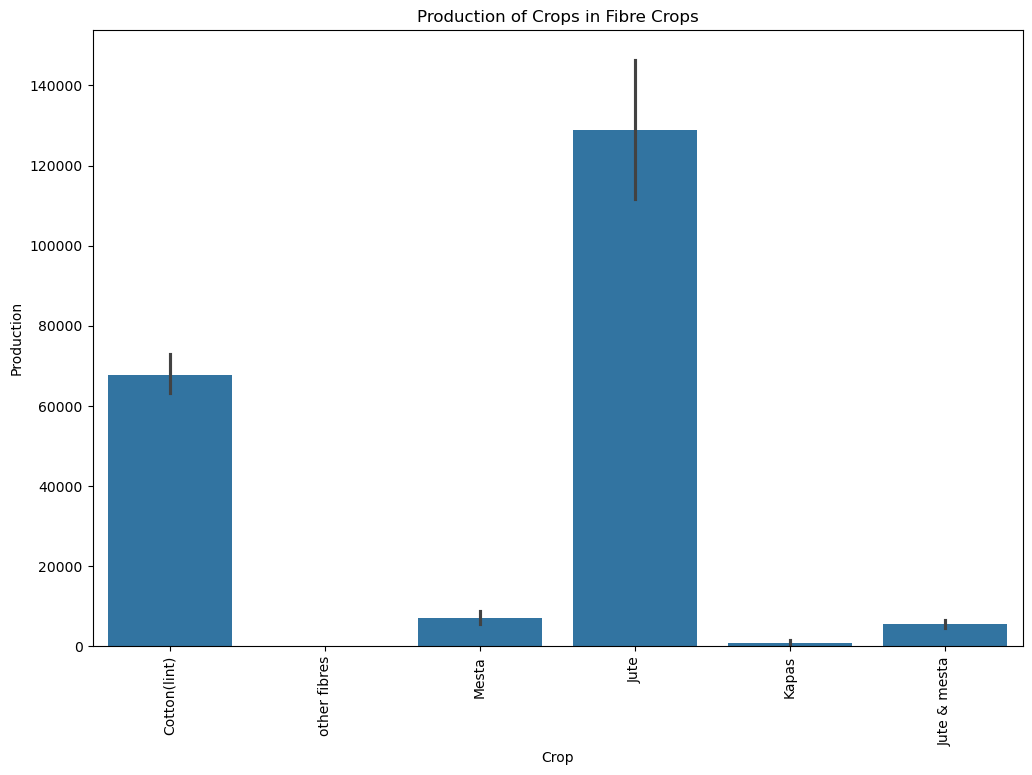

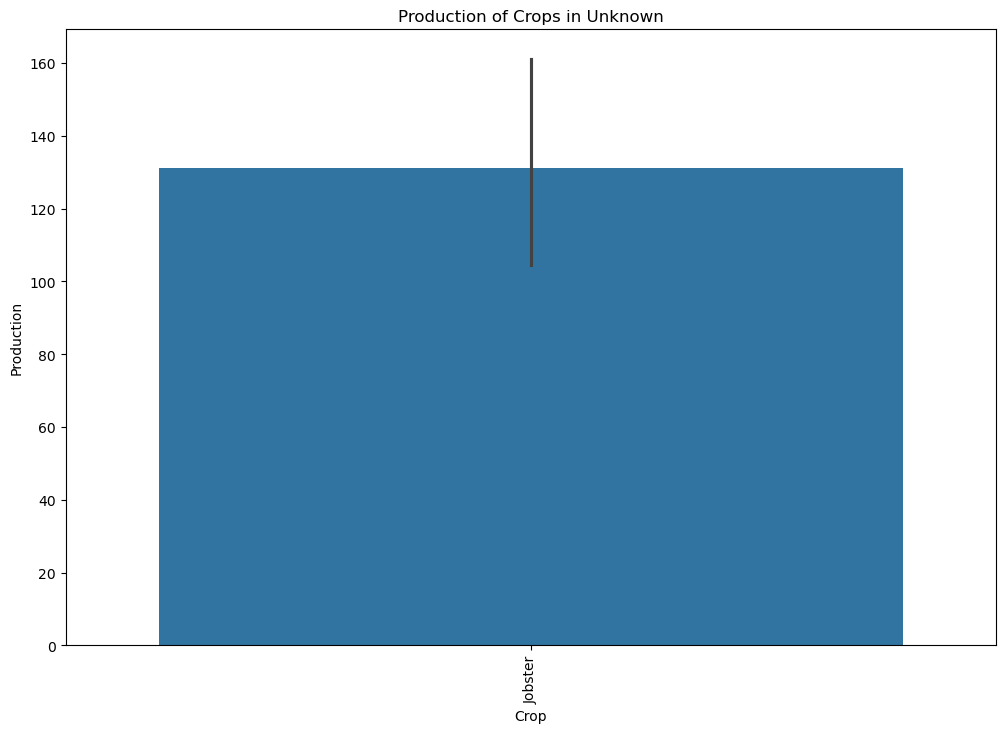

In [96]:
crop_categories = df['Crop_Category'].unique()

# Plot for each crop category
for category in crop_categories:
    plt.figure(figsize=(12, 8))
    category_data = df[df['Crop_Category'] == category]
    
    # Optional: aggregate production if needed
    # e.g., to show average production per crop
    # category_data = category_data.groupby('Crop').agg({'Production': 'mean'}).reset_index()

    sns.barplot(x='Crop', y='Production', data=category_data)
    plt.title(f'Production of Crops in {category}')
    plt.xlabel('Crop')
    plt.ylabel('Production')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.show()

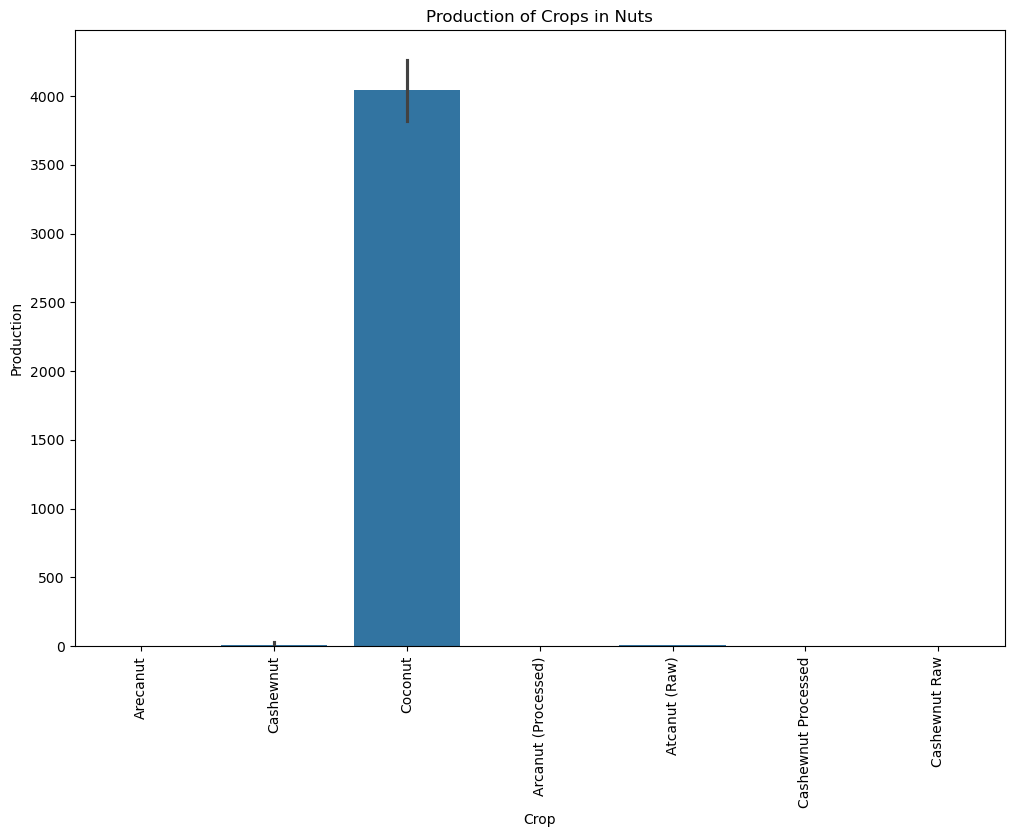

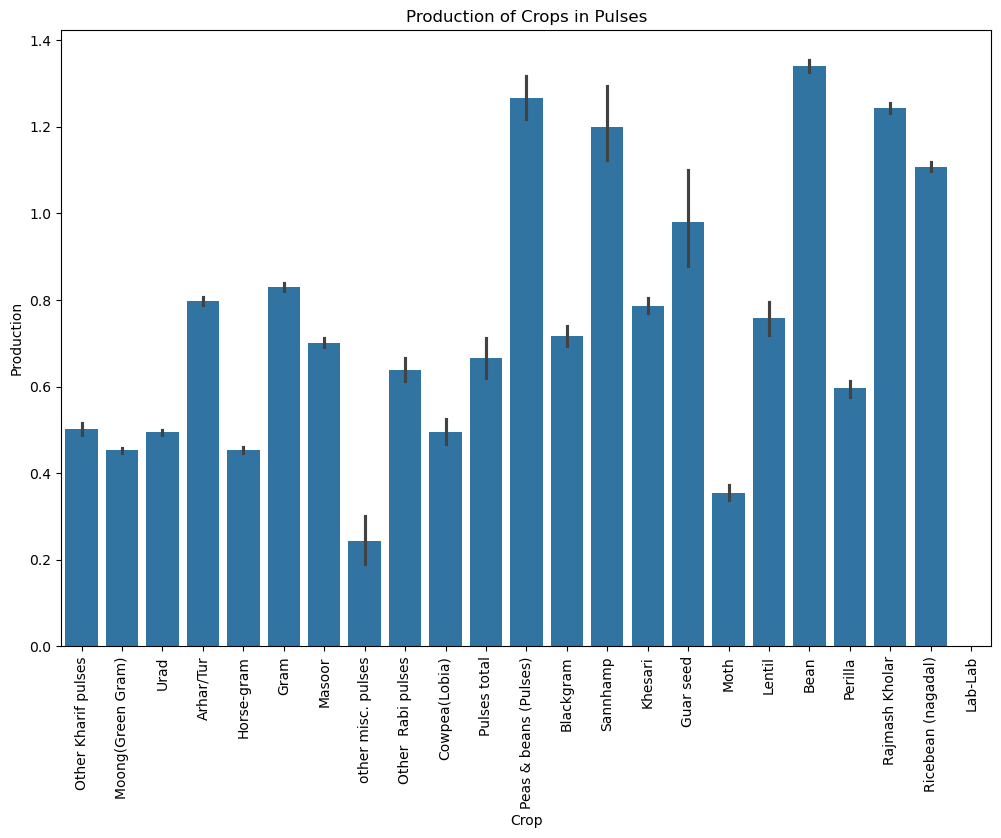

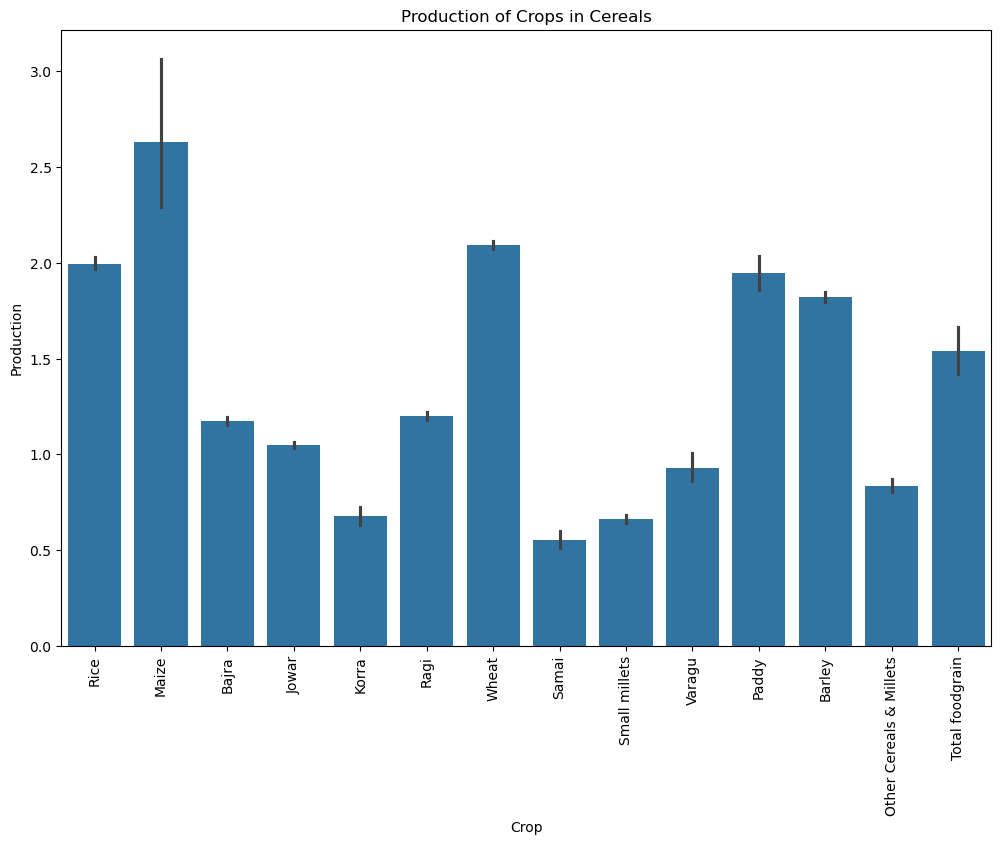

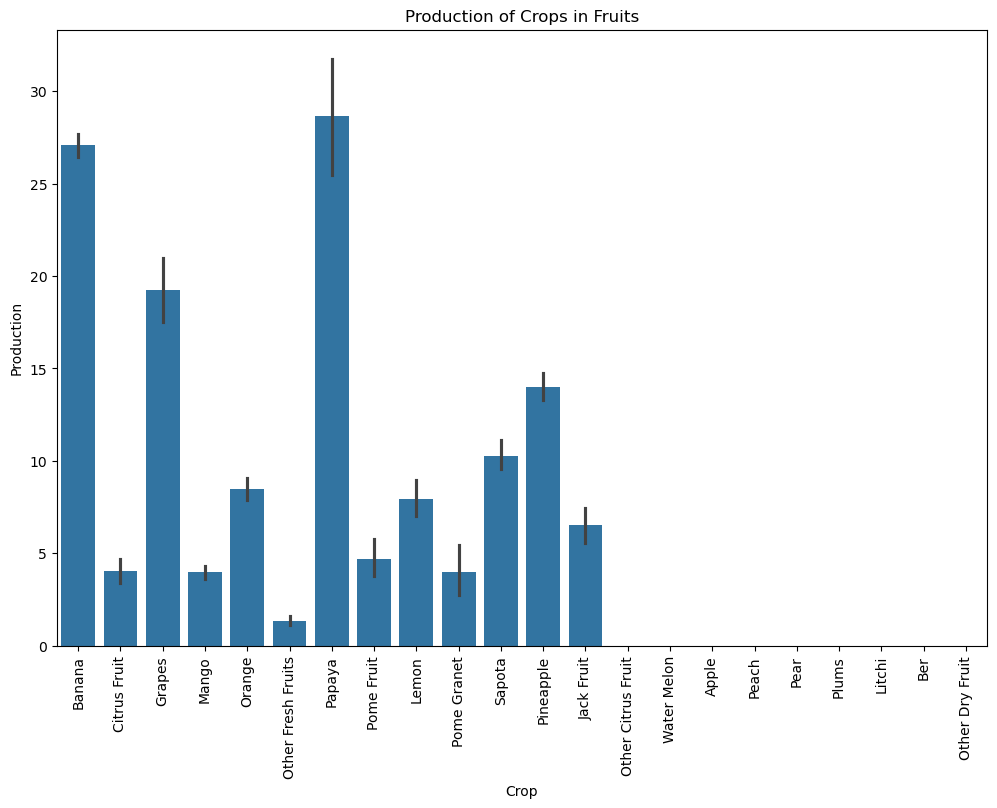

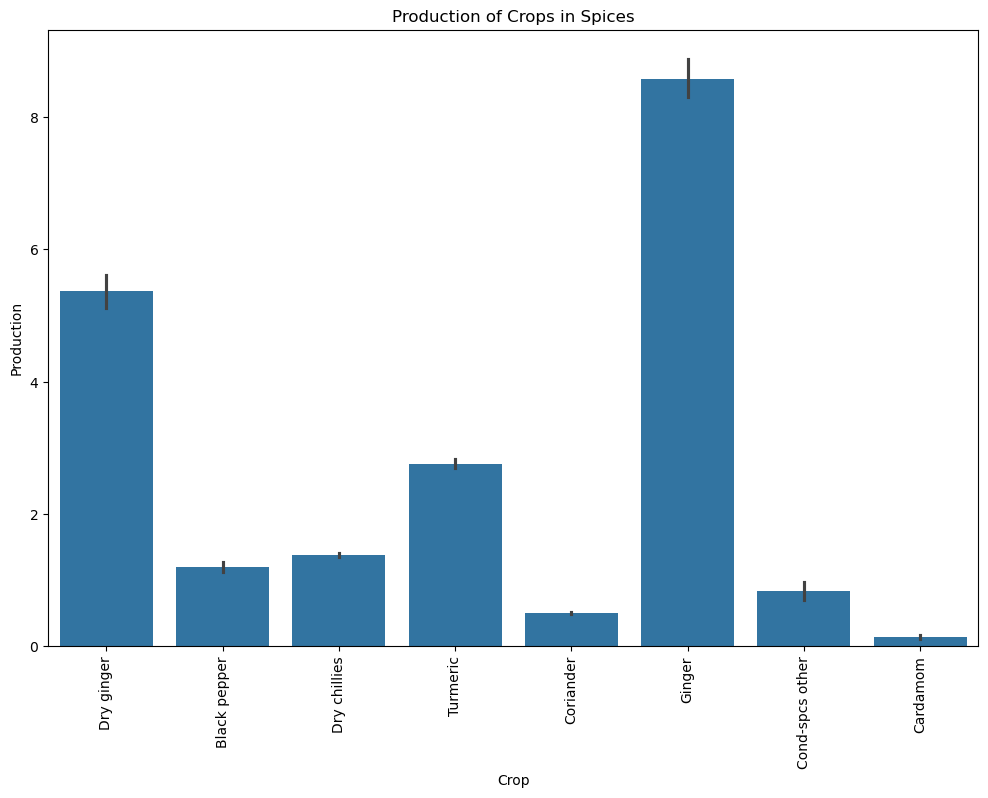

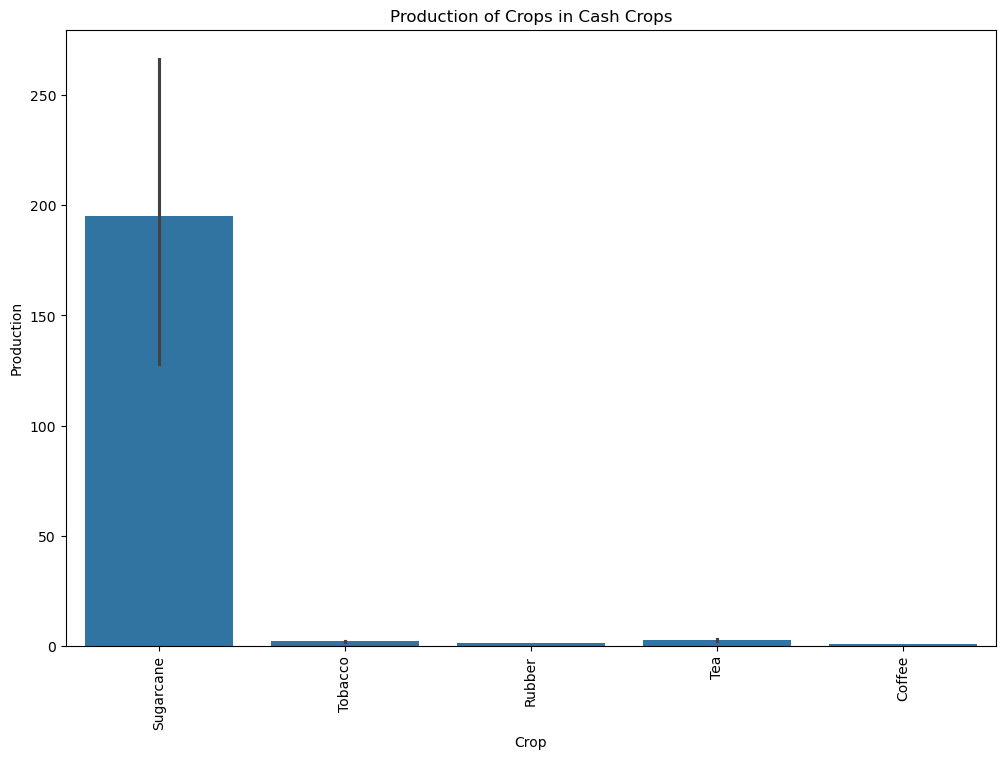

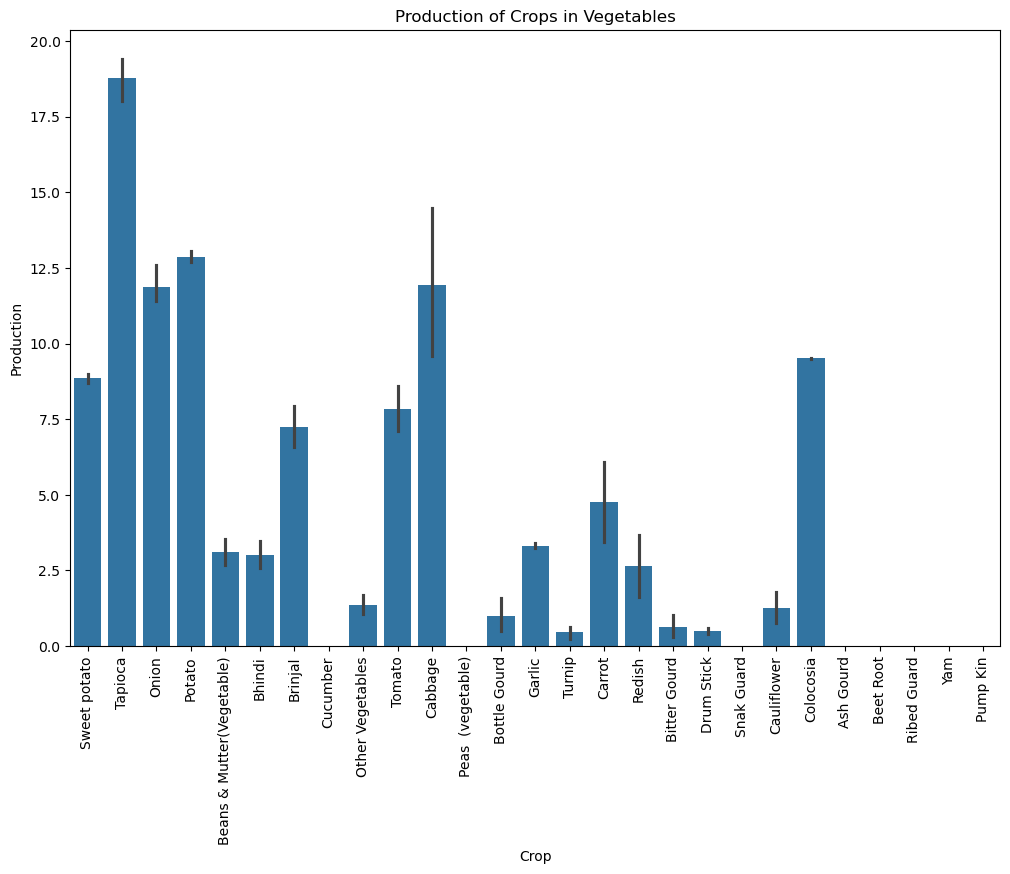

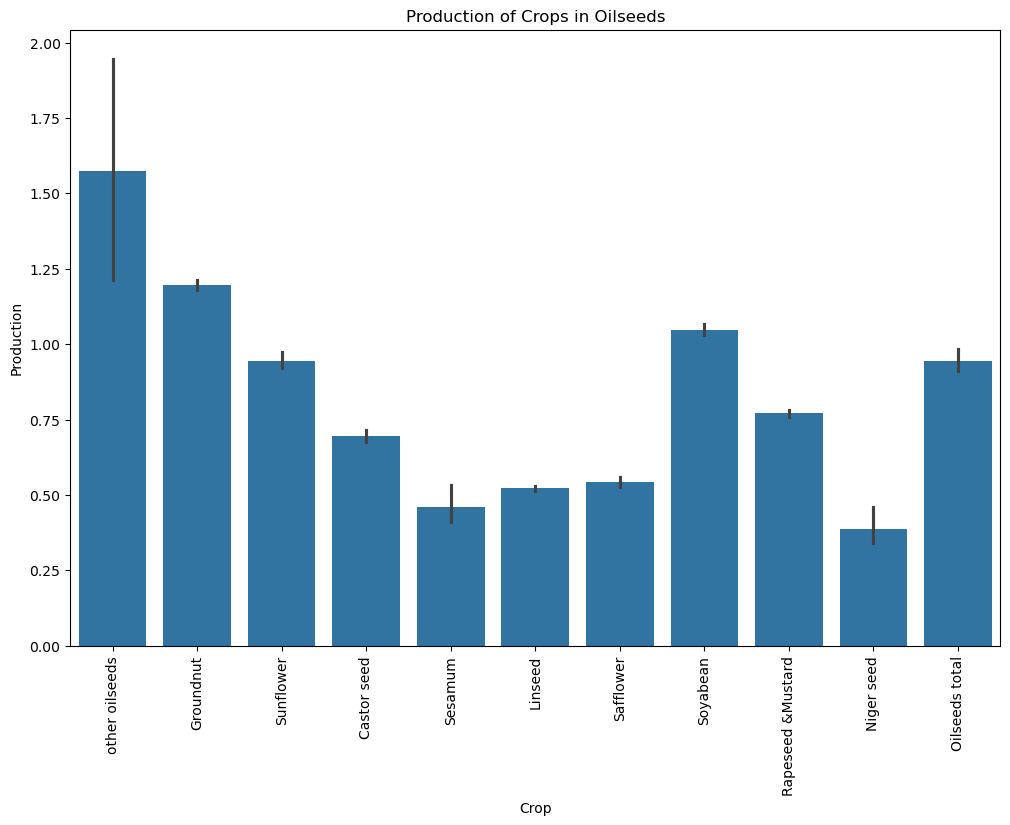

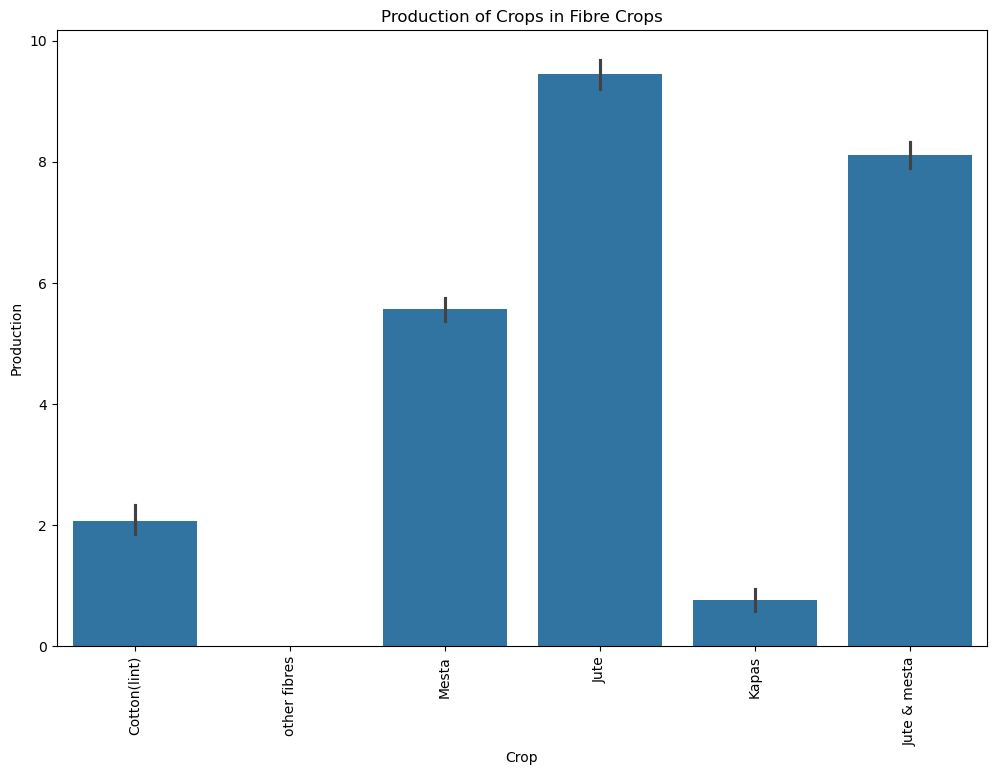

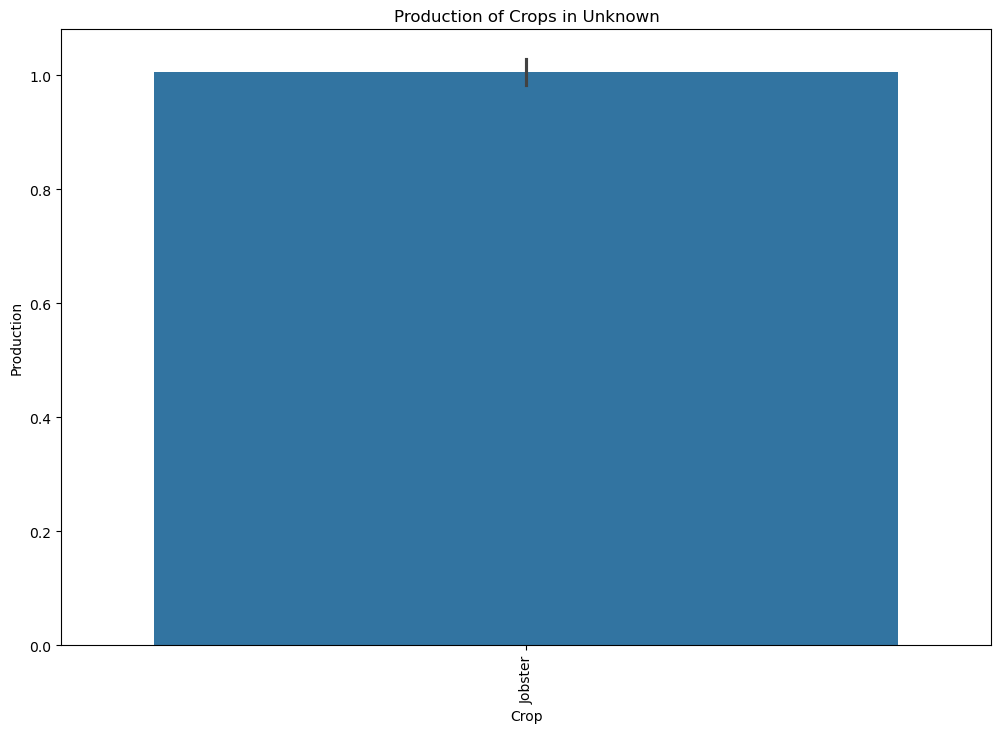

In [21]:
crop_categories = df['Crop_Category'].unique()

# Plot for each crop category
for category in crop_categories:
    plt.figure(figsize=(12, 8))
    category_data = df[df['Crop_Category'] == category]
    
    # Optional: aggregate production if needed
    # e.g., to show average production per crop
    # category_data = category_data.groupby('Crop').agg({'Production': 'mean'}).reset_index()

    sns.barplot(x='Crop', y='Yield', data=category_data)
    plt.title(f'Production of Crops in {category}')
    plt.xlabel('Crop')
    plt.ylabel('Production')
    plt.xticks(rotation=90)  # Rotate x labels for better readability
    plt.show()

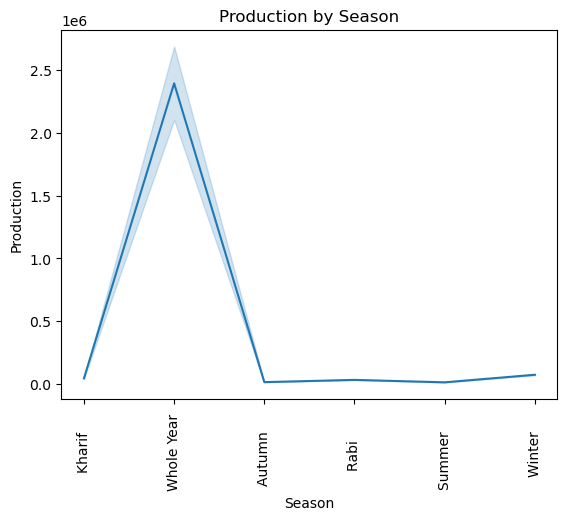

In [23]:
sns.lineplot(x="Season", y="Production", data=df)
plt.xticks(rotation=90)
plt.title('Production by Season')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()


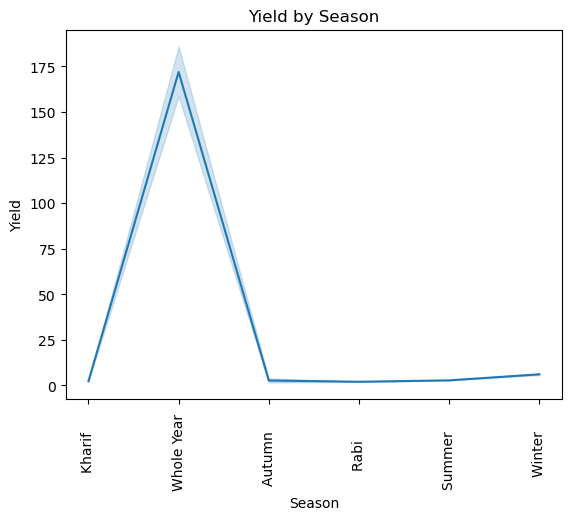

In [24]:
sns.lineplot(x="Season", y="Yield", data=df)
plt.xticks(rotation=90)
plt.title('Yield by Season')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.show()

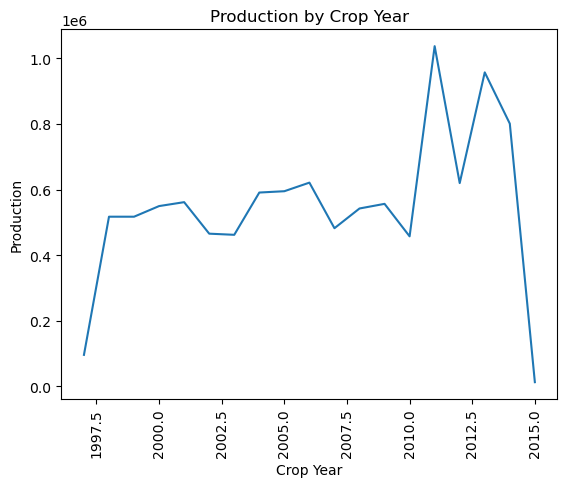

In [25]:
sns.lineplot(x="Crop_Year", y="Production", data=df, errorbar=None)
plt.xticks(rotation=90)
plt.title('Production by Crop Year')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.show()

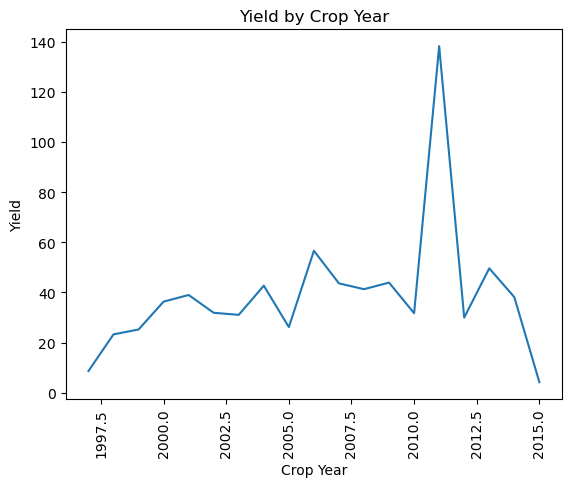

In [26]:
sns.lineplot(x="Crop_Year", y="Yield", data=df, errorbar=None)
plt.xticks(rotation=90)
plt.title('Yield by Crop Year')
plt.xlabel('Crop Year')
plt.ylabel('Yield')
plt.show()

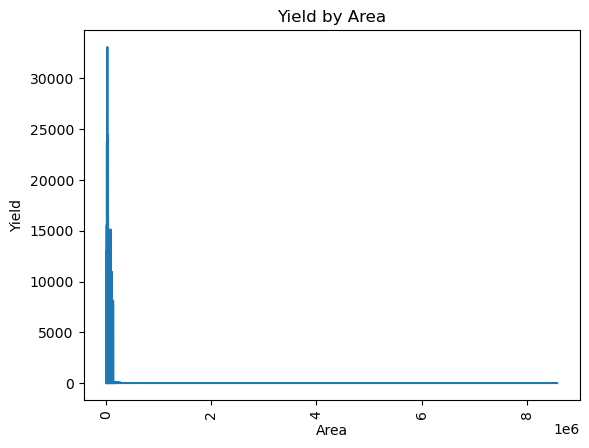

In [27]:
sns.lineplot(x="Area", y="Yield", data=df, errorbar=None)
plt.xticks(rotation=90)
plt.title('Yield by Area')
plt.xlabel('Area')
plt.ylabel('Yield')
plt.show()

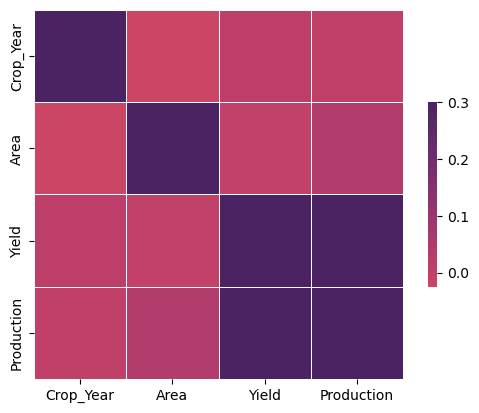

In [28]:
cmap = sns.color_palette("flare", as_cmap=True)
sns.heatmap(df[['Crop_Year', 'Area', 'Yield', 'Production']].corr(),
            cmap=cmap, 
            vmax=.3, 
            center=0, 
            square=True, 
            linewidths=.5, 
            cbar_kws={"shrink": .5})

plt.show()

**Now analyzing Each crop (Rice, Wheat, Potato, Cotton, Maize)**

**1) Rice**

In [29]:
df_rice_data = df[df["Crop"]=="Rice"]
df_rice_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Crop_Category
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.00,321.00,3.147059,Cereals
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.00,300.00,3.614458,Cereals
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.20,510.84,2.700000,Cereals
27,Andaman and Nicobar Islands,NICOBARS,2003,Kharif,Rice,52.00,90.17,1.734038,Cereals
36,Andaman and Nicobar Islands,NICOBARS,2004,Kharif,Rice,52.94,72.57,1.370797,Cereals


In [30]:
df_rice_data.shape

(15082, 9)

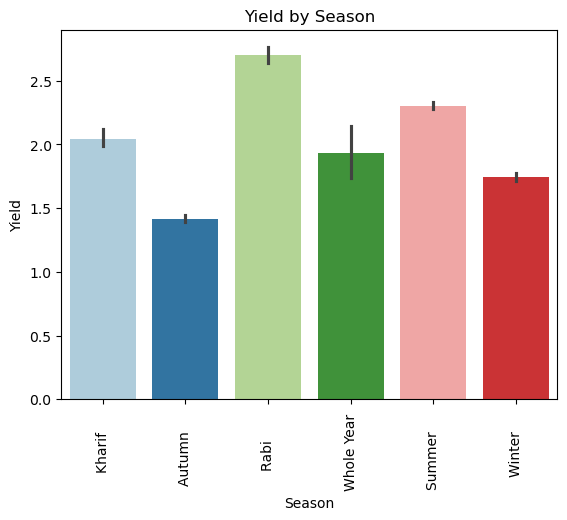

In [33]:
sns.barplot(x="Season", y="Yield", data=df_rice_data,palette="Paired", hue="Season", legend= False)
plt.xticks(rotation=90)
plt.title('Yield by Season')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.show()

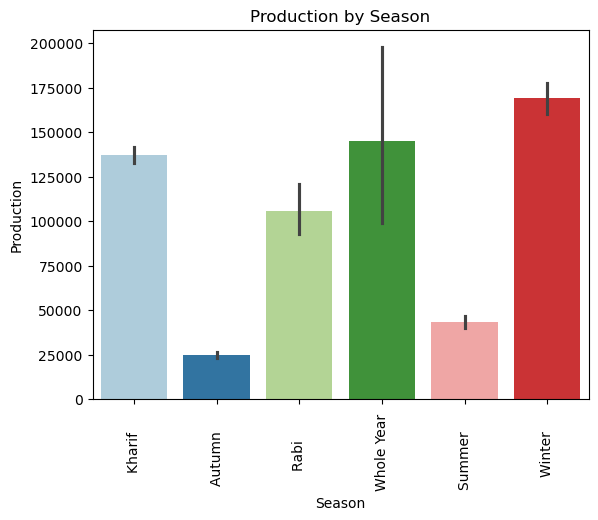

In [34]:
sns.barplot(x="Season", y="Production", data=df_rice_data,palette="Paired", hue="Season", legend= False)
plt.xticks(rotation=90)
plt.title('Production by Season')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

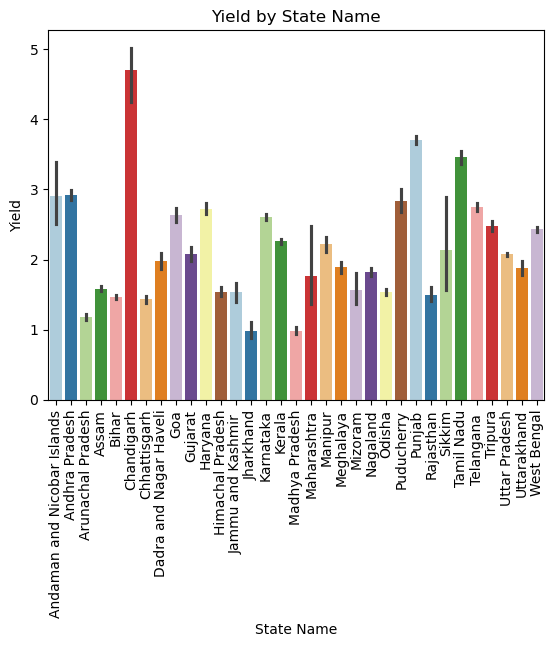

In [35]:
sns.barplot(x="State_Name", y="Yield", data=df_rice_data,palette="Paired", hue="State_Name", legend= False)
plt.xticks(rotation=90)
plt.title('Yield by State Name')
plt.xlabel('State Name')
plt.ylabel('Yield')
plt.show()

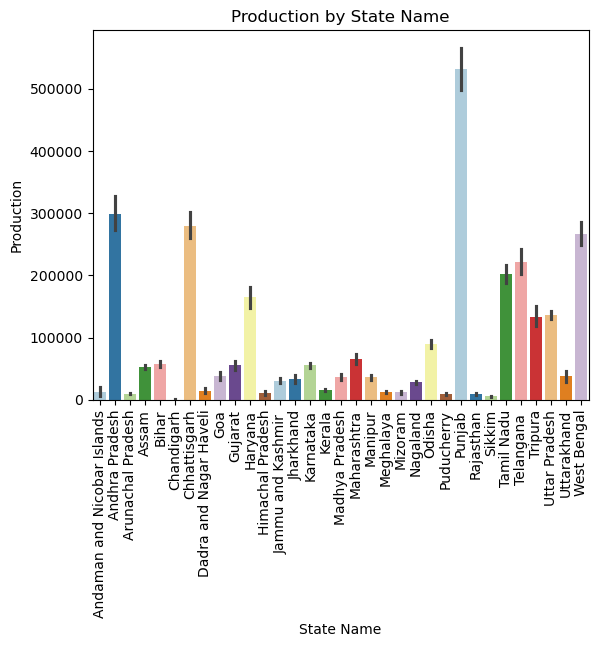

In [36]:
sns.barplot(x="State_Name", y="Production", data=df_rice_data,palette="Paired", hue="State_Name", legend= False)
plt.xticks(rotation=90)
plt.title('Production by State Name')
plt.xlabel('State Name')
plt.ylabel('Production')
plt.show()

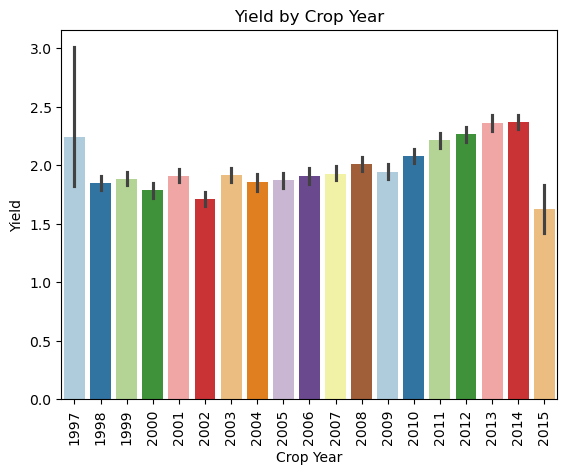

In [37]:
sns.barplot(x="Crop_Year", y="Yield", data=df_rice_data,palette="Paired", hue="Crop_Year", legend= False)
plt.xticks(rotation=90)
plt.title('Yield by Crop Year')
plt.xlabel('Crop Year')
plt.ylabel('Yield')
plt.show()

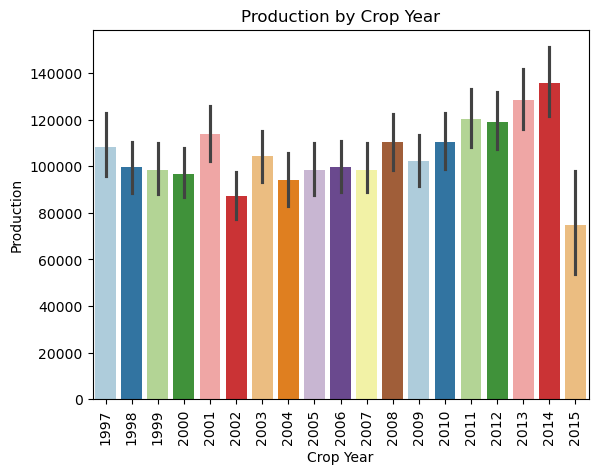

In [38]:
sns.barplot(x="Crop_Year", y="Production", data=df_rice_data,palette="Paired", hue="Crop_Year", legend= False)
plt.xticks(rotation=90)
plt.title('Production by Crop Year')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.show()

**2) Wheat**

In [39]:
df_wheat_data = df[df["Crop"] == "Wheat"]
df_wheat_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Crop_Category
228,Andhra Pradesh,ANANTAPUR,1997,Rabi,Wheat,300.0,200.0,0.666667,Cereals
253,Andhra Pradesh,ANANTAPUR,1998,Rabi,Wheat,400.0,200.0,0.500000,Cereals
282,Andhra Pradesh,ANANTAPUR,1999,Rabi,Wheat,439.0,294.0,0.669704,Cereals
324,Andhra Pradesh,ANANTAPUR,2000,Rabi,Wheat,520.0,297.0,0.571154,Cereals
370,Andhra Pradesh,ANANTAPUR,2001,Rabi,Wheat,307.0,213.0,0.693811,Cereals


In [40]:
df_wheat_data.shape

(7878, 9)

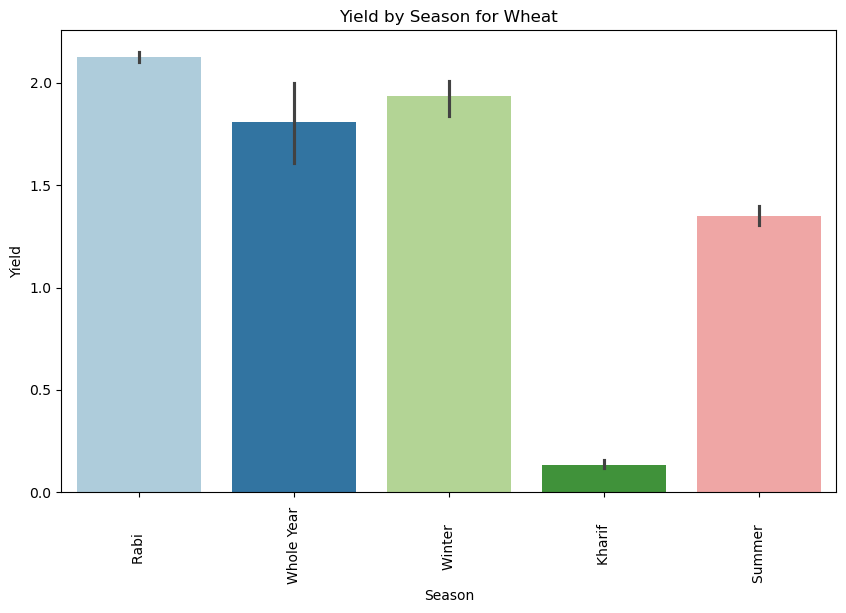

In [41]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Yield", data=df_wheat_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Season for Wheat')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.show()

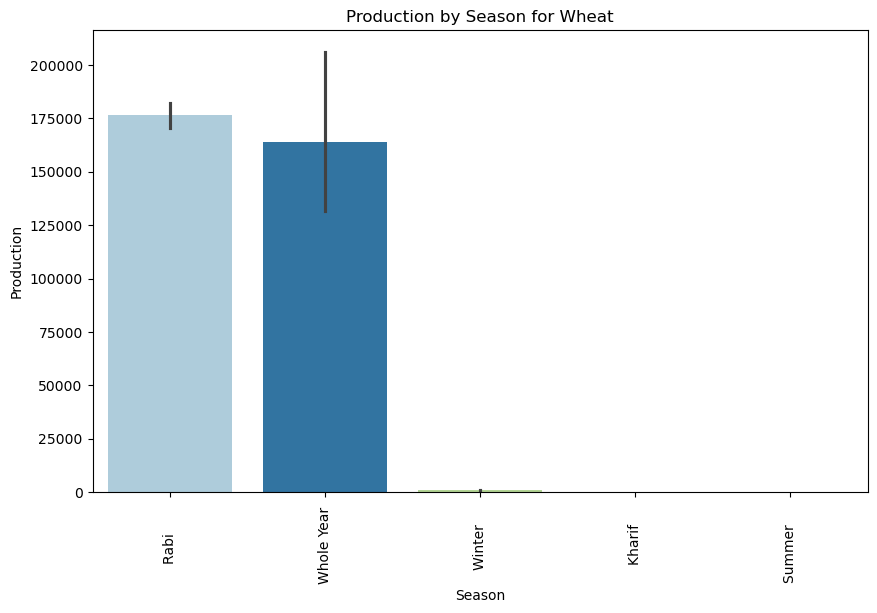

In [42]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Production", data=df_wheat_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Season for Wheat')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

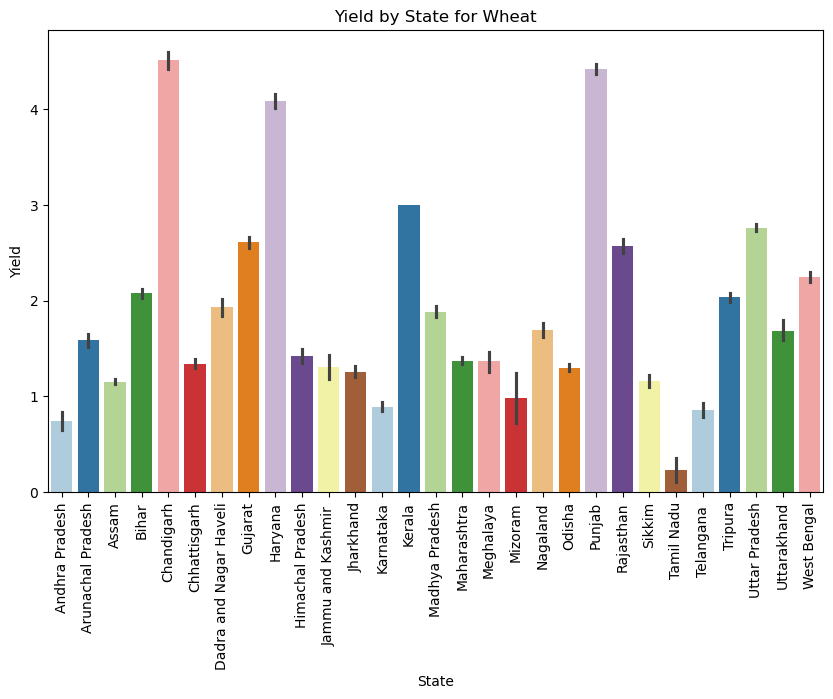

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Yield", data=df_wheat_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by State for Wheat')
plt.xlabel('State')
plt.ylabel('Yield')
plt.show()

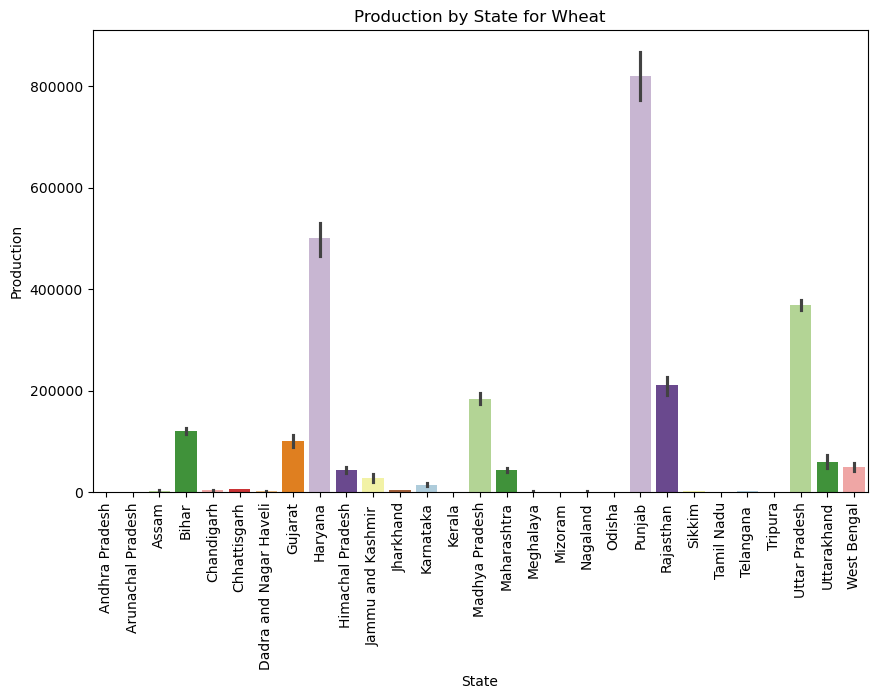

In [44]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Production", data=df_wheat_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Production by State for Wheat')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

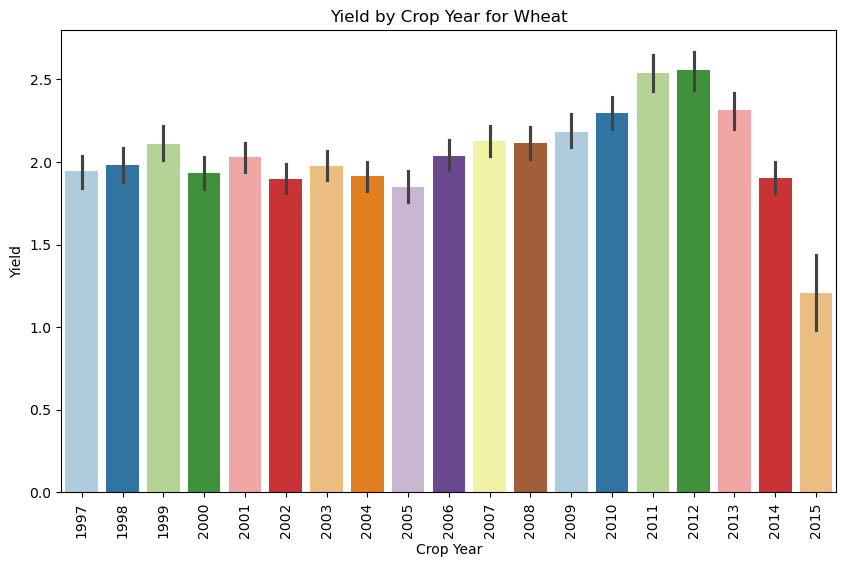

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Yield", data=df_wheat_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Crop Year for Wheat')
plt.xlabel('Crop Year')
plt.ylabel('Yield')
plt.show()

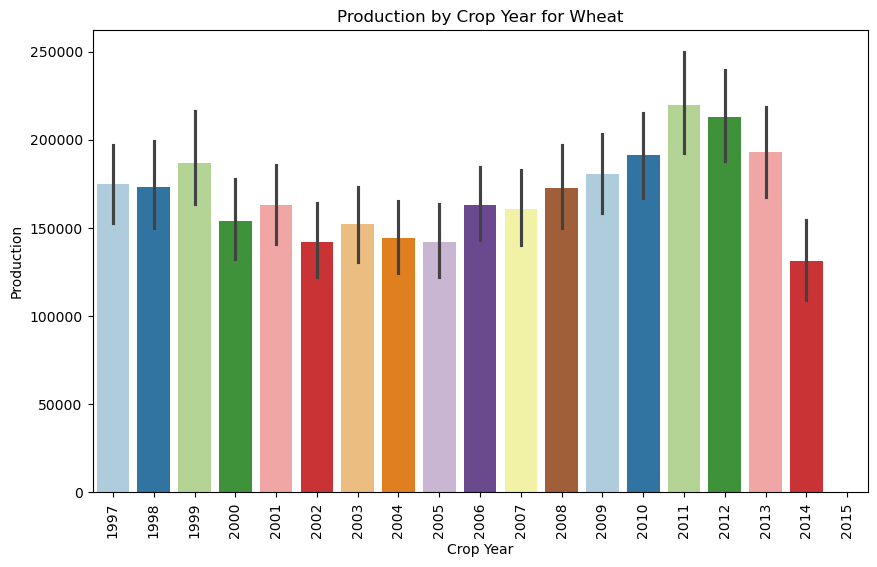

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Production", data=df_wheat_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Crop Year for Wheat')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.show()

**3) Potato**

In [47]:
df_potato_data = df[df["Crop"] == "Potato"]
df_potato_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Crop_Category
329,Andhra Pradesh,ANANTAPUR,2000,Whole Year,Potato,4.0,34.0,8.500000,Vegetables
431,Andhra Pradesh,ANANTAPUR,2002,Whole Year,Potato,2.0,17.0,8.500000,Vegetables
528,Andhra Pradesh,ANANTAPUR,2004,Whole Year,Potato,2.0,20.0,10.000000,Vegetables
739,Andhra Pradesh,ANANTAPUR,2010,Whole Year,Potato,21.0,236.0,11.238095,Vegetables
786,Andhra Pradesh,ANANTAPUR,2011,Whole Year,Potato,18.0,181.0,10.055556,Vegetables


In [48]:
df_potato_data.shape

(6914, 9)

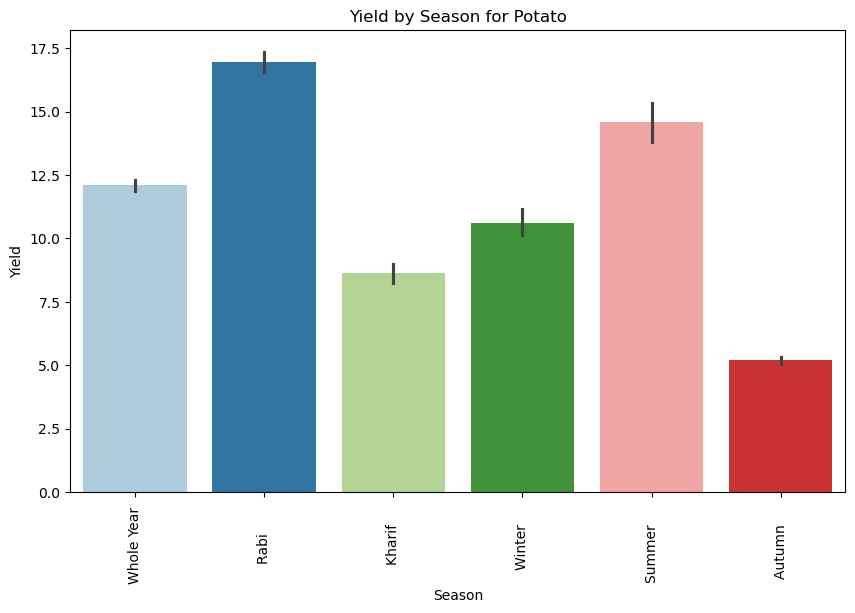

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Yield", data=df_potato_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Season for Potato')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.show()

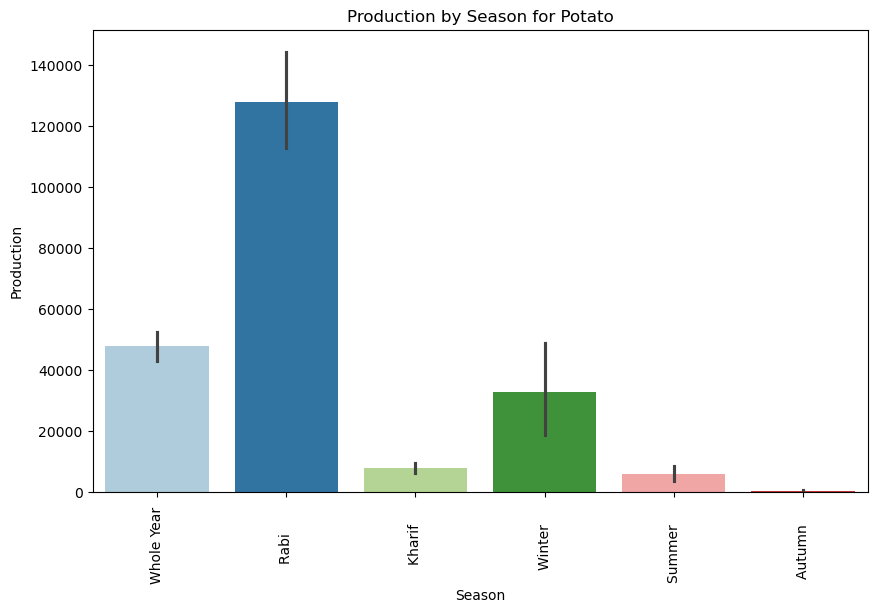

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Production", data=df_potato_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Season for Potato')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

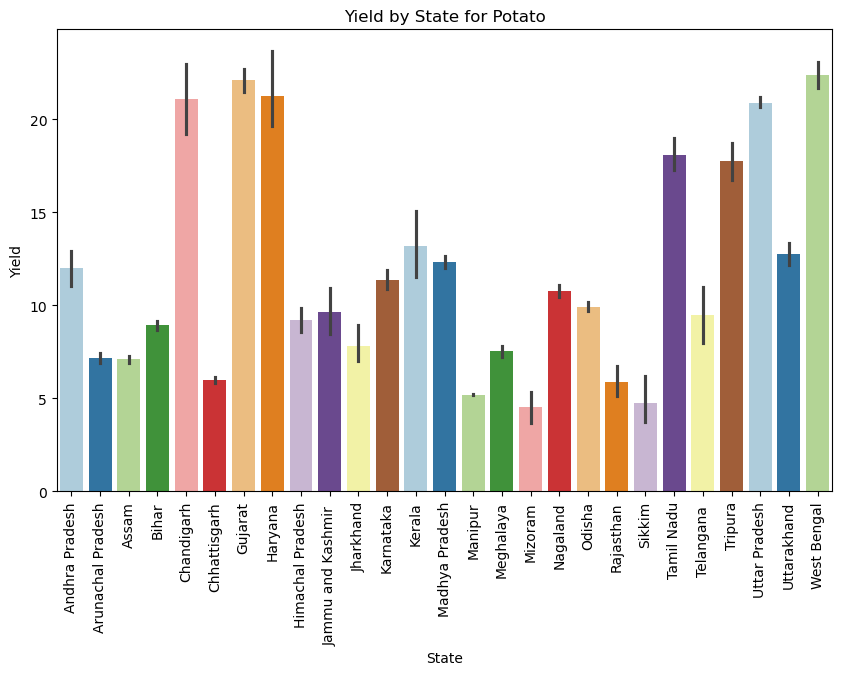

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Yield", data=df_potato_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by State for Potato')
plt.xlabel('State')
plt.ylabel('Yield')
plt.show()

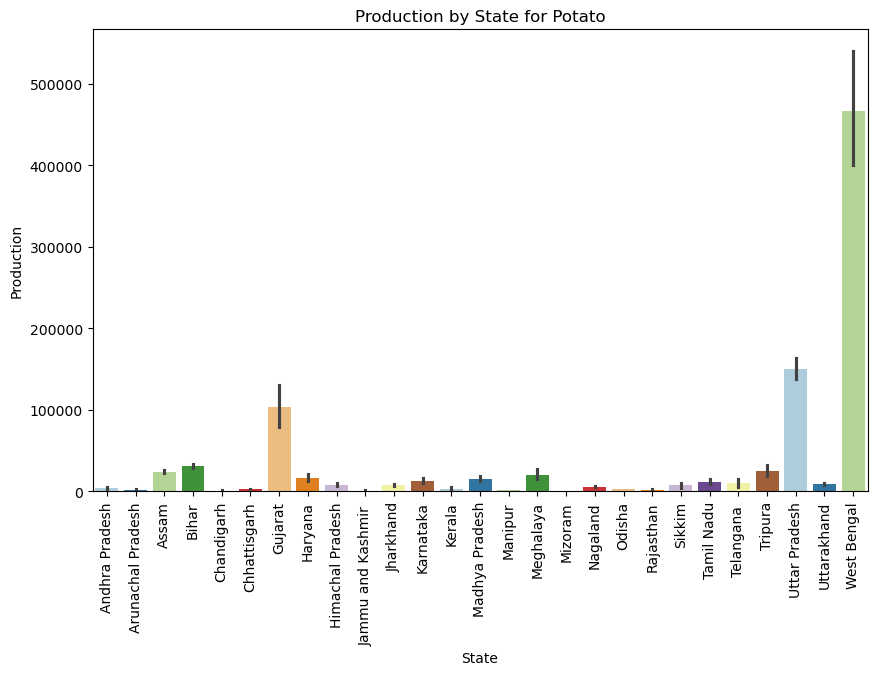

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Production", data=df_potato_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Production by State for Potato')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

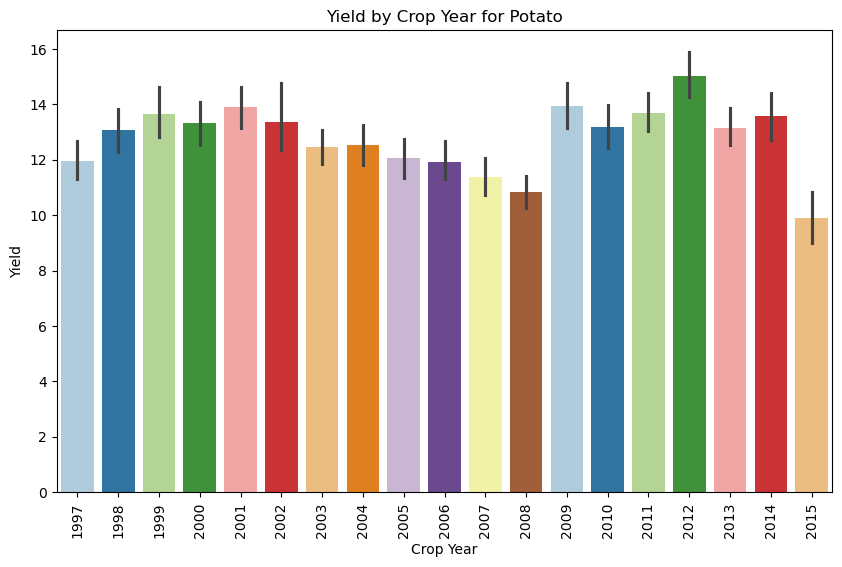

In [53]:
# Yield by Crop Year
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Yield", data=df_potato_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Crop Year for Potato')
plt.xlabel('Crop Year')
plt.ylabel('Yield')
plt.show()

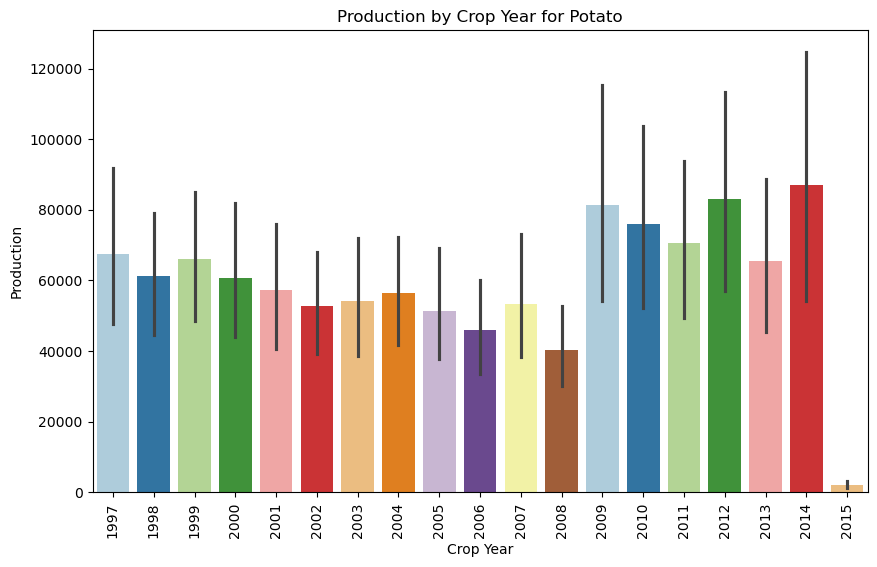

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Production", data=df_potato_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Crop Year for Potato')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.show()

**4) Coconut**

In [55]:
df_coconut_data = df[df["Crop"] == "Coconut"]
df_coconut_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Crop_Category
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.00,65100000.0,3583.223250,Nuts
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.00,64430000.0,3542.056075,Nuts
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.00,67490000.0,3700.109649,Nuts
32,Andaman and Nicobar Islands,NICOBARS,2003,Whole Year,Coconut,18284.74,68580000.0,3750.668590,Nuts
41,Andaman and Nicobar Islands,NICOBARS,2004,Whole Year,Coconut,18394.70,52380000.0,2847.559351,Nuts
...,...,...,...,...,...,...,...,...,...
241990,West Bengal,PURULIA,2004,Whole Year,Coconut,66.00,296.1,4.486364,Nuts
242027,West Bengal,PURULIA,2005,Whole Year,Coconut,74.00,311.0,4.202703,Nuts
242063,West Bengal,PURULIA,2006,Whole Year,Coconut,73.00,365000.0,5000.000000,Nuts
242108,West Bengal,PURULIA,2007,Whole Year,Coconut,58.00,898000.0,15482.758621,Nuts


In [56]:
df_coconut_data.shape

(1958, 9)

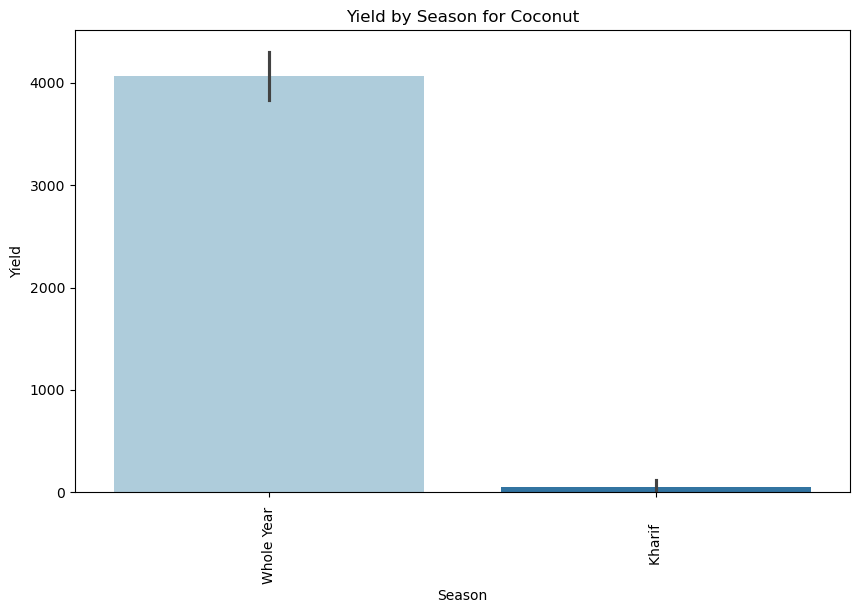

In [57]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Yield", data=df_coconut_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Season for Coconut')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.show()

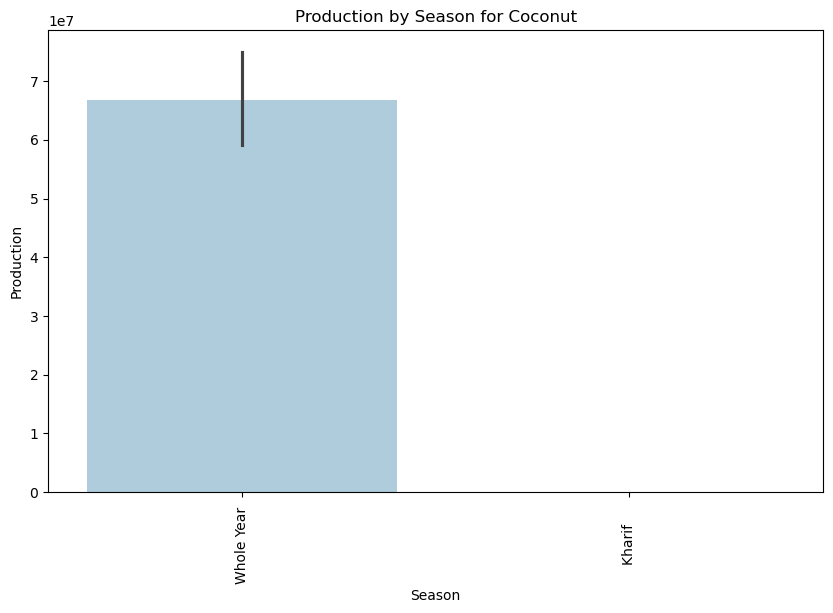

In [59]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Production", data=df_coconut_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Season for Coconut')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

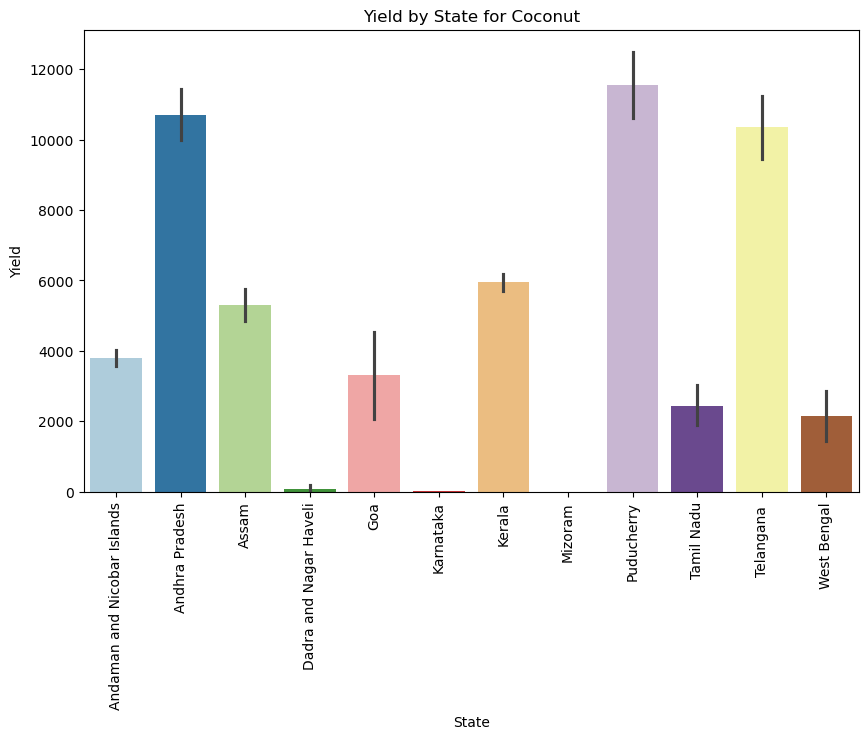

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Yield", data=df_coconut_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by State for Coconut')
plt.xlabel('State')
plt.ylabel('Yield')
plt.show()

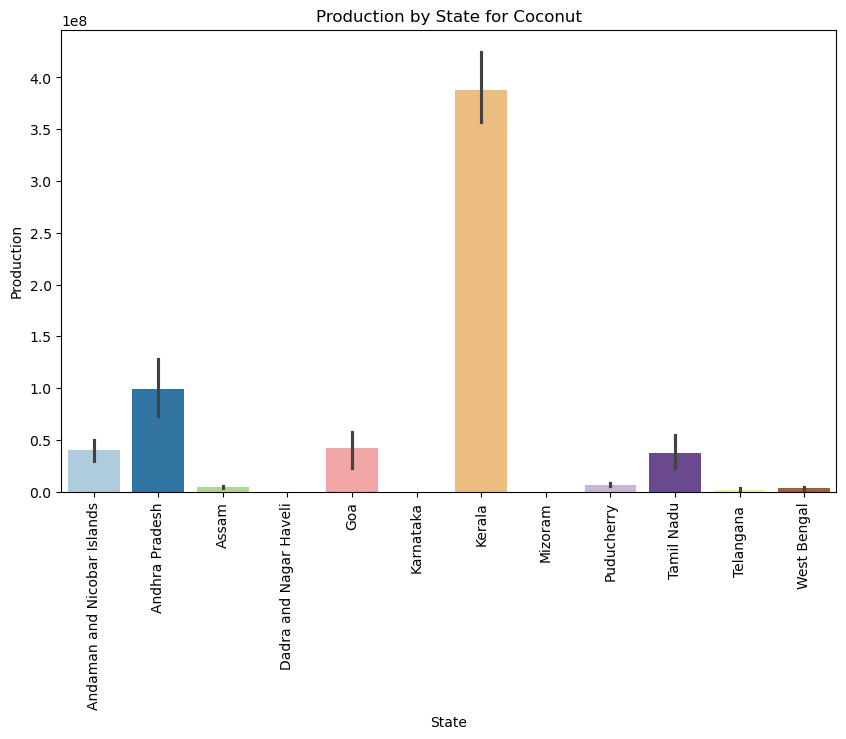

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Production", data=df_coconut_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Production by State for Coconut')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

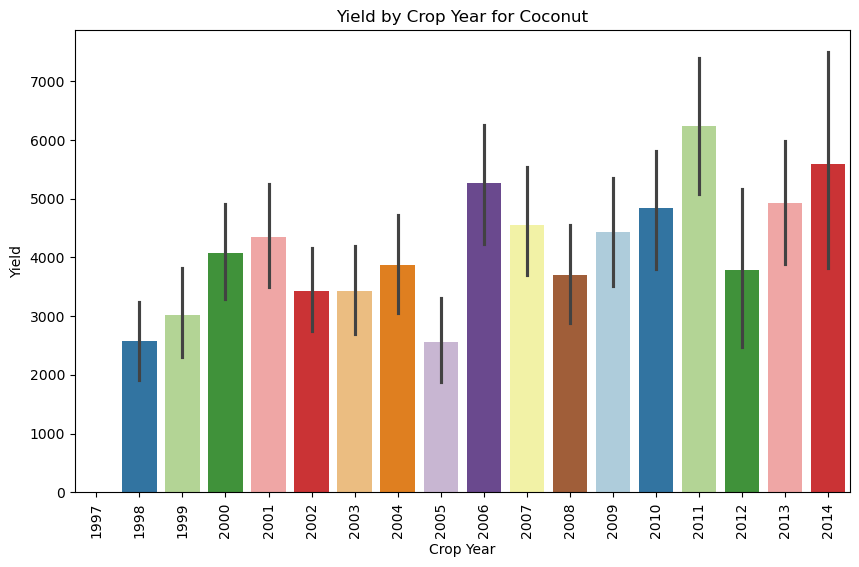

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Yield", data=df_coconut_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Crop Year for Coconut')
plt.xlabel('Crop Year')
plt.ylabel('Yield')
plt.show()

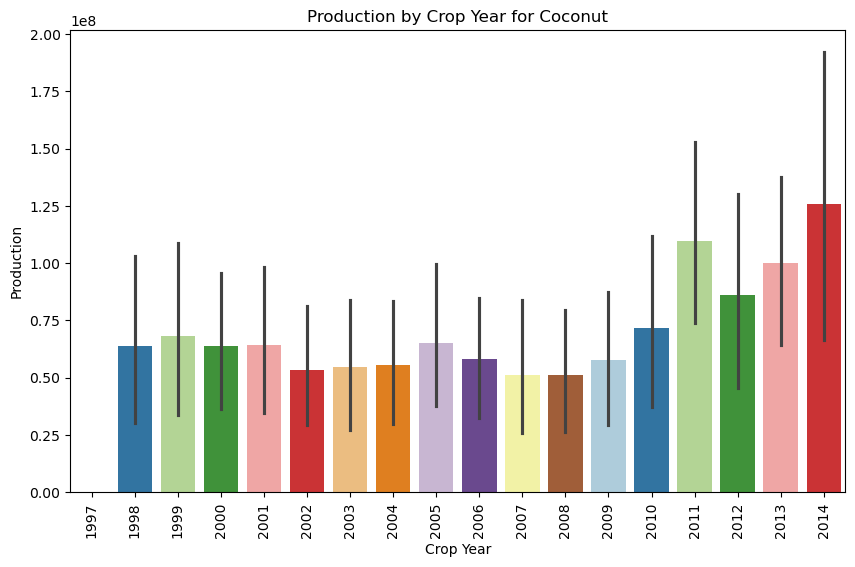

In [65]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Production", data=df_coconut_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Crop Year for Coconut')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.show()

**5) Maize**

In [66]:
df_maize_data = df[df["Crop"] == "Maize"]
df_maize_data.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield,Crop_Category
69,Andaman and Nicobar Islands,NICOBARS,2010,Rabi,Maize,3.84,18.22,4.744792,Cereals
118,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,2010,Rabi,Maize,86.70,96.40,1.111880,Cereals
192,Andaman and Nicobar Islands,SOUTH ANDAMANS,2010,Rabi,Maize,73.00,253.00,3.465753,Cereals
210,Andhra Pradesh,ANANTAPUR,1997,Kharif,Maize,2800.00,4900.00,1.750000,Cereals
224,Andhra Pradesh,ANANTAPUR,1997,Rabi,Maize,600.00,2400.00,4.000000,Cereals


In [67]:
df_maize_data.shape

(13787, 9)

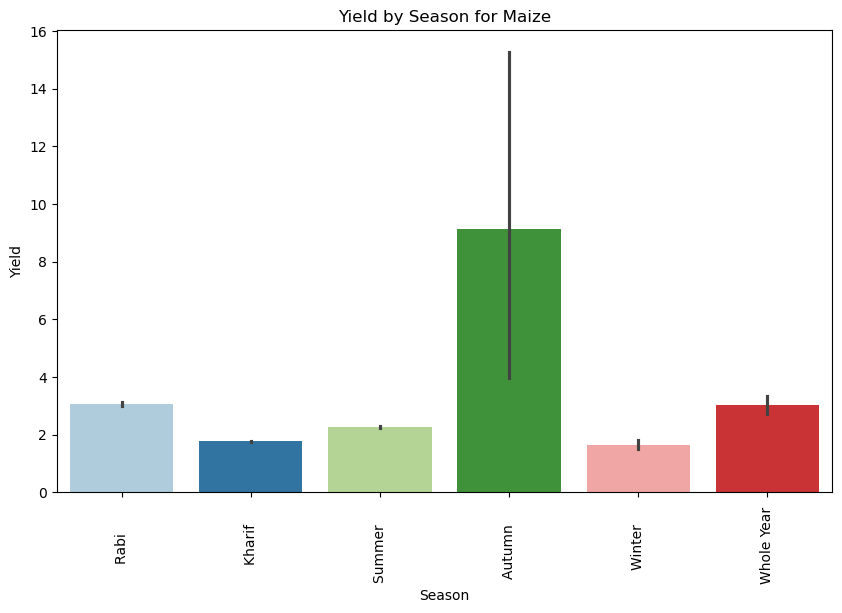

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Yield", data=df_maize_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Season for Maize')
plt.xlabel('Season')
plt.ylabel('Yield')
plt.show()

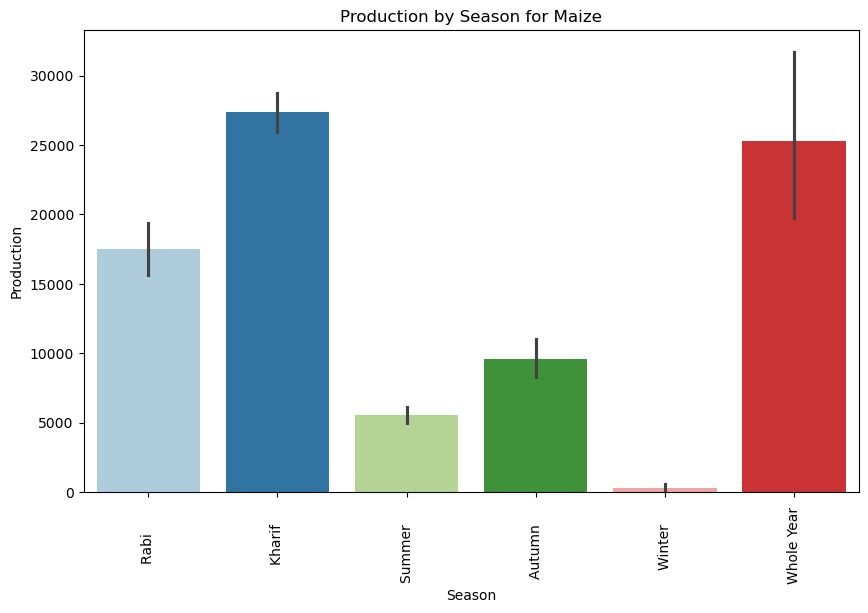

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Season", y="Production", data=df_maize_data, palette="Paired", hue="Season", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Season for Maize')
plt.xlabel('Season')
plt.ylabel('Production')
plt.show()

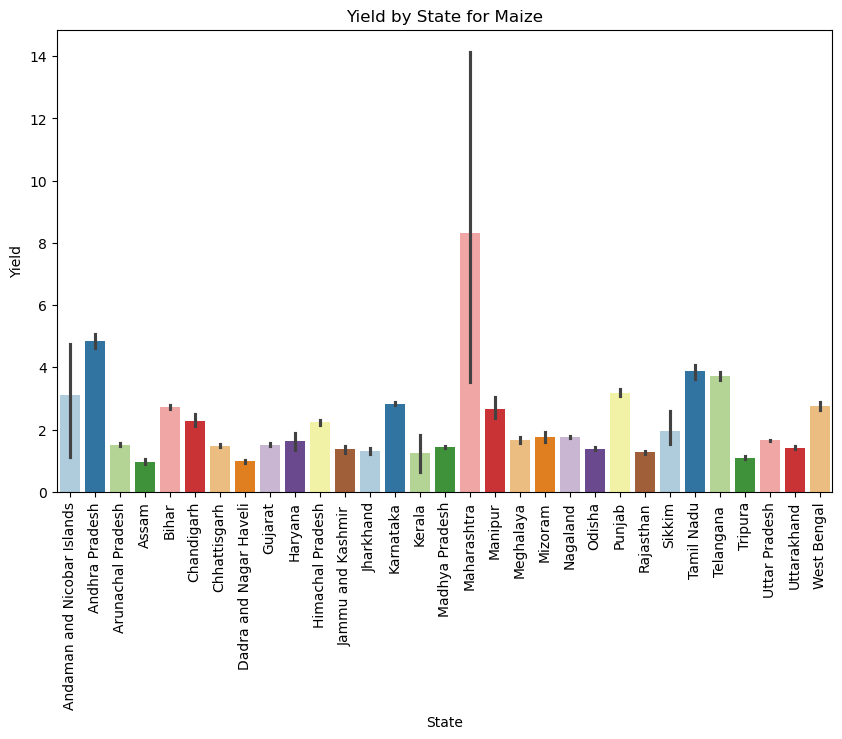

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Yield", data=df_maize_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by State for Maize')
plt.xlabel('State')
plt.ylabel('Yield')
plt.show()

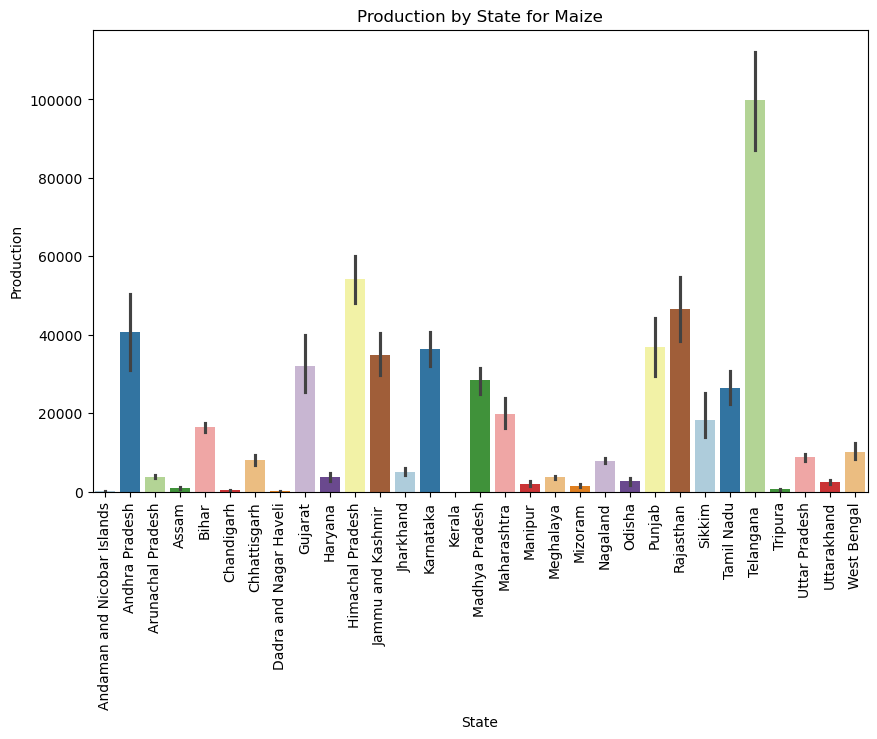

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x="State_Name", y="Production", data=df_maize_data, palette="Paired", hue="State_Name", legend=False)
plt.xticks(rotation=90)
plt.title('Production by State for Maize')
plt.xlabel('State')
plt.ylabel('Production')
plt.show()

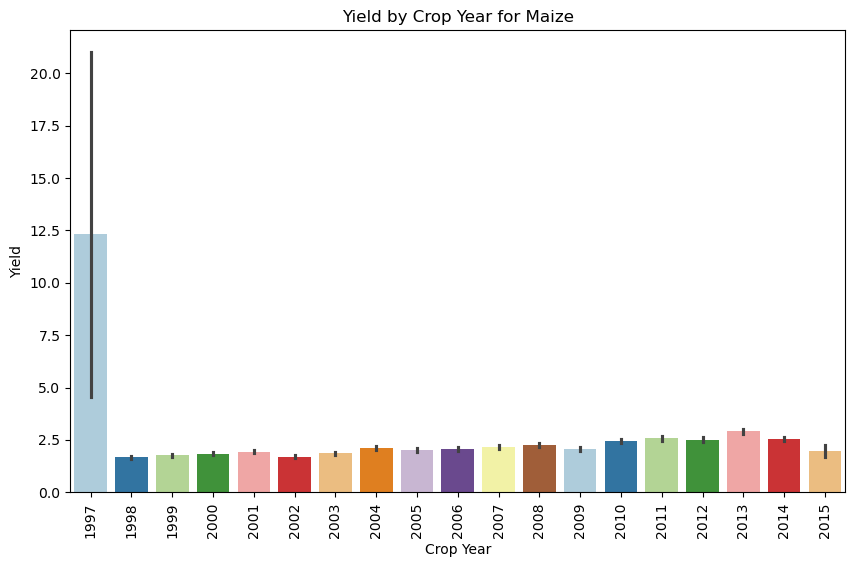

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Yield", data=df_maize_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Yield by Crop Year for Maize')
plt.xlabel('Crop Year')
plt.ylabel('Yield')
plt.show()


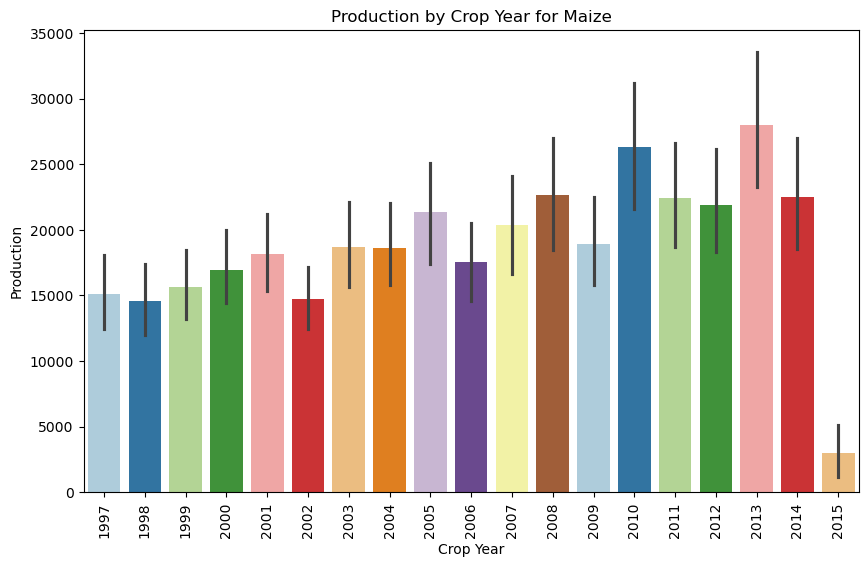

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Crop_Year", y="Production", data=df_maize_data, palette="Paired", hue="Crop_Year", legend=False)
plt.xticks(rotation=90)
plt.title('Production by Crop Year for Maize')
plt.xlabel('Crop Year')
plt.ylabel('Production')
plt.show()